In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.2 MB/s eta 0:00:00


Data collection

In [2]:
import fastf1
import pandas as pd
import logging

logging.getLogger('fastf1').setLevel(logging.ERROR) #to suppress messages getting logged by fastf1 while loading the data into the cache
obj = fastf1.get_event(2024, 'Monza') #we are accessing the data for 2024 monza gp
obj1=obj.get_race() #accessing the race data (not quali or fp)
obj1.load(laps=True, telemetry=True, weather=True, messages=True, livedata=None)

laps = obj1.laps

telemetry = laps.iloc[0].get_telemetry() #this function returns lap-wise telemetry data => .iloc[0] is accessing only the first lap
#and thus we are getting only first lap ka telemetry data

weather = obj1.weather_data

results = obj1.results # this is our output variable (GridPosition column) - the position of each driver

laps.to_csv('laps.csv')
telemetry.to_csv('telemetry.csv')
weather.to_csv('weather.csv')
results.to_csv('results.csv')

Primary data exploration and understanding the data

In [3]:
#weather data
import pandas as pd
parse_timedelta = pd.to_timedelta #this will help us parse the Time column in the apt date-time format, instead of a string
df = pd.read_csv('weather.csv', converters={'Time': parse_timedelta})
df.info()
display(df.dtypes)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Unnamed: 0     133 non-null    int64          
 1   Time           133 non-null    timedelta64[ns]
 2   AirTemp        133 non-null    float64        
 3   Humidity       133 non-null    float64        
 4   Pressure       133 non-null    float64        
 5   Rainfall       133 non-null    bool           
 6   TrackTemp      133 non-null    float64        
 7   WindDirection  133 non-null    int64          
 8   WindSpeed      133 non-null    float64        
dtypes: bool(1), float64(5), int64(2), timedelta64[ns](1)
memory usage: 8.6 KB


,0
Unnamed: 0,int64
Time,timedelta64[ns]
AirTemp,float64
Humidity,float64
Pressure,float64
Rainfall,bool
TrackTemp,float64
WindDirection,int64
WindSpeed,float64


,Unnamed: 0,Time,AirTemp,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed
count,133.00000,133,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,66.00000,0 days 01:06:26.418571428,33.101504,32.285714,993.228571,49.311278,200.624060,1.518797
std,38.53786,0 days 00:38:32.399001189,0.554183,1.448988,0.334748,3.775532,49.616652,0.507840
min,0.00000,0 days 00:00:26.141000,32.200000,30.000000,992.700000,43.500000,0.000000,0.400000
25%,33.00000,0 days 00:33:26.362000,32.500000,31.000000,993.000000,45.500000,190.000000,1.200000
50%,66.00000,0 days 01:06:26.407000,33.200000,32.000000,993.100000,49.500000,197.000000,1.500000
75%,99.00000,0 days 01:39:26.535000,33.600000,33.000000,993.500000,53.200000,214.000000,1.800000
max,132.00000,0 days 02:12:26.670000,34.100000,38.000000,993.900000,54.600000,352.000000,3.200000


Column: Unnamed: 0
  Skewness: 0.0000
  Kurtosis: -1.2001


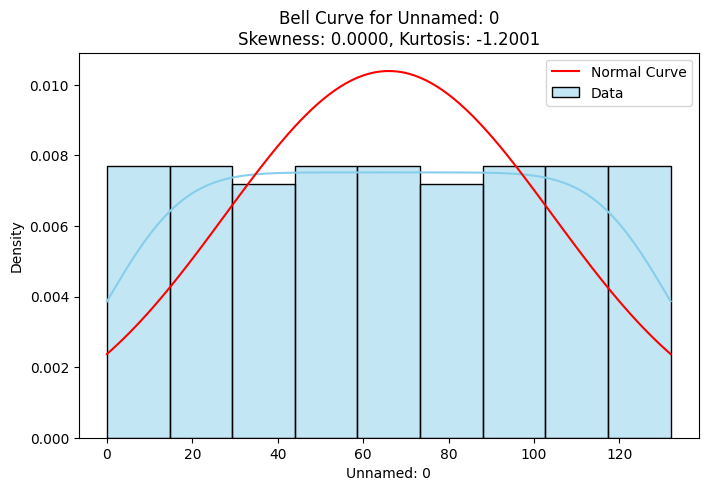

Column: AirTemp
  Skewness: -0.0604
  Kurtosis: -1.3974


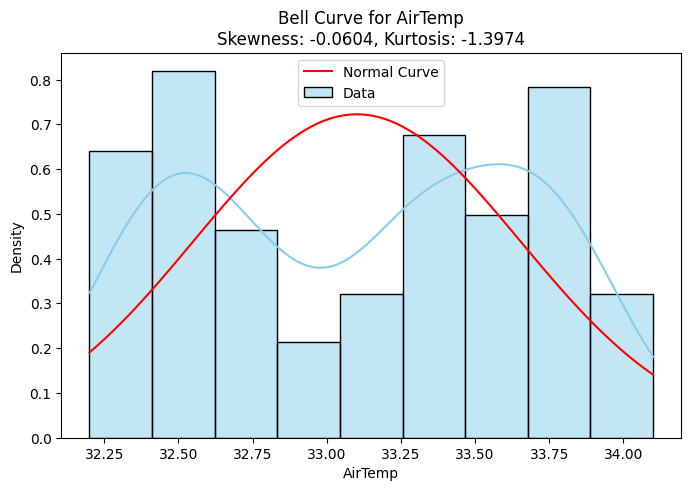

Column: Humidity
  Skewness: 1.3981
  Kurtosis: 2.4512


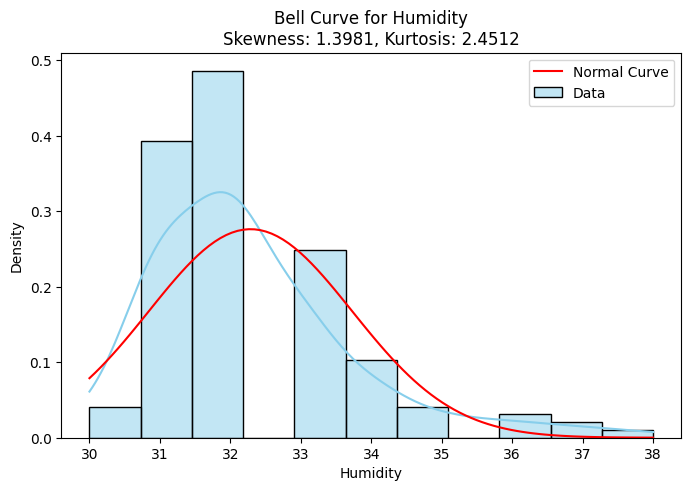

Column: Pressure
  Skewness: 0.6003
  Kurtosis: -0.9409


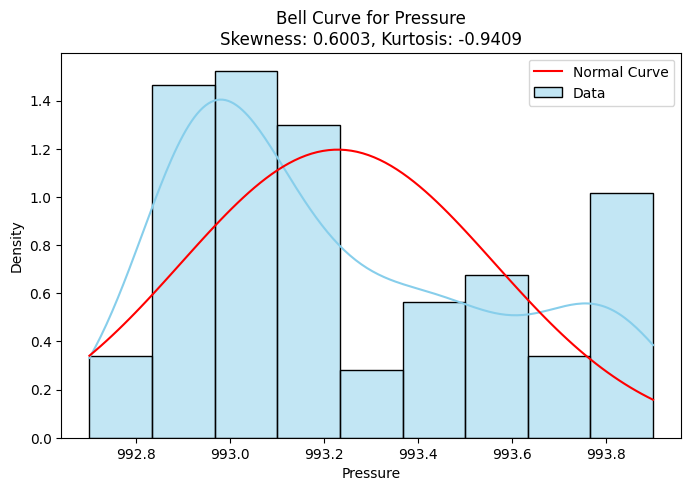

Column: TrackTemp
  Skewness: -0.0530
  Kurtosis: -1.6608


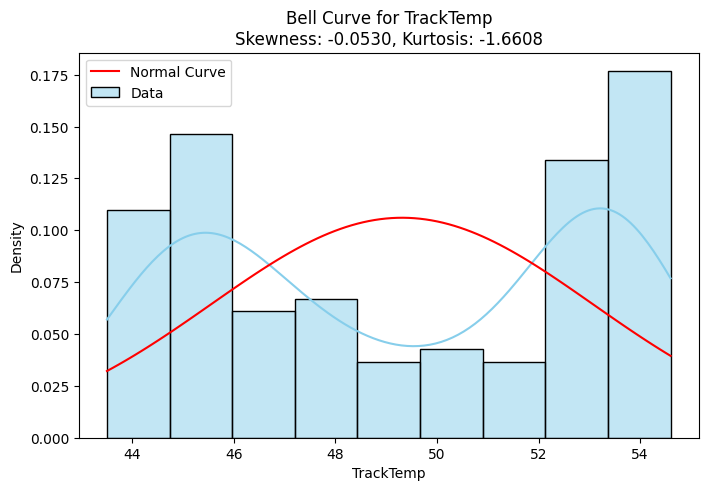

Column: WindDirection
  Skewness: -0.7541
  Kurtosis: 7.0179


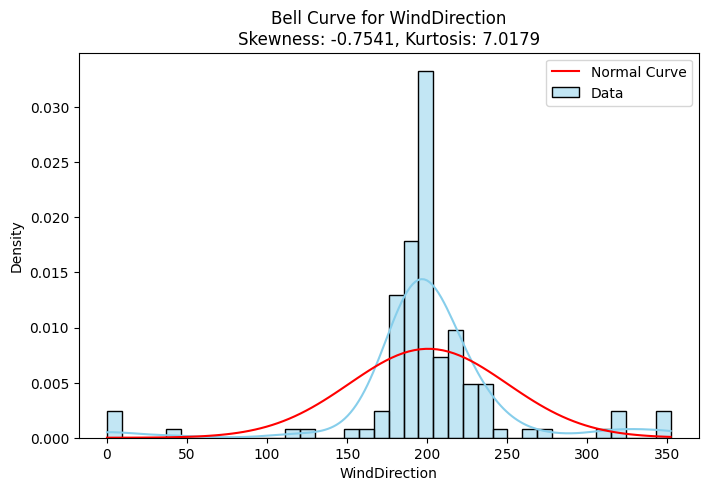

Column: WindSpeed
  Skewness: 0.3003
  Kurtosis: 0.2307


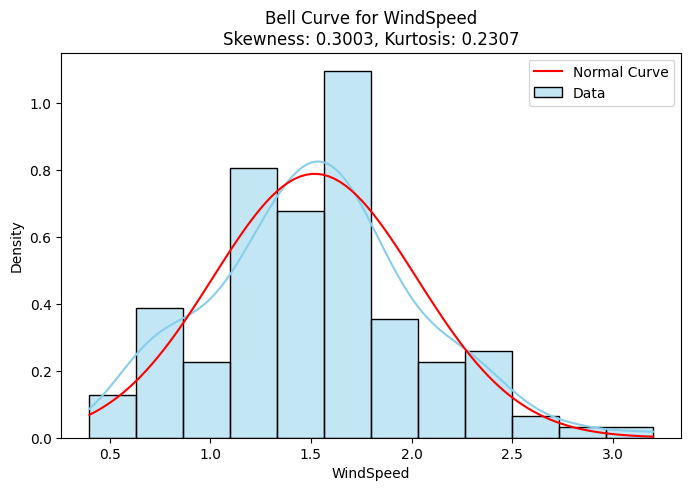

In [25]:
#test skewness, kurtosis and normality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

# Load your CSV file
file_path = 'weather.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select only numerical columns
numeric_data = data.select_dtypes(include=np.number)

# Iterate through each numeric column
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()

    # Calculate skewness and kurtosis
    col_skewness = skew(col_data)
    col_kurtosis = kurtosis(col_data)

    # Print skewness and kurtosis
    print(f"Column: {column}")
    print(f"  Skewness: {col_skewness:.4f}")
    print(f"  Kurtosis: {col_kurtosis:.4f}")

    # Plot bell curve
    plt.figure(figsize=(8, 5))
    sns.histplot(col_data, kde=True, stat="density", color="skyblue", label='Data')

    # Plot normal distribution for comparison
    mean = np.mean(col_data)
    std = np.std(col_data)
    x = np.linspace(min(col_data), max(col_data), 100)
    plt.plot(x, norm.pdf(x, mean, std), color="red", label='Normal Curve')

    plt.title(f'Bell Curve for {column}\nSkewness: {col_skewness:.4f}, Kurtosis: {col_kurtosis:.4f}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [4]:
#telemetry data
import pandas as pd

parse_timedelta = pd.to_timedelta
df = pd.read_csv('telemetry.csv', converters={'Time': parse_timedelta})
df.info()
display(df.dtypes)
df.describe()

#DriverAhead has a lot of Null values as the p1 driver will not have anyone ahead of him

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             680 non-null    int64          
 1   Date                   680 non-null    object         
 2   SessionTime            680 non-null    object         
 3   DriverAhead            672 non-null    float64        
 4   DistanceToDriverAhead  680 non-null    float64        
 5   Time                   680 non-null    timedelta64[ns]
 6   RPM                    680 non-null    int64          
 7   Speed                  680 non-null    int64          
 8   nGear                  680 non-null    int64          
 9   Throttle               680 non-null    int64          
 10  Brake                  680 non-null    bool           
 11  DRS                    680 non-null    int64          
 12  Source                 680 non-null    object     

,0
Unnamed: 0,int64
Date,object
SessionTime,object
DriverAhead,float64
DistanceToDriverAhead,float64
Time,timedelta64[ns]
RPM,int64
Speed,int64
nGear,int64
Throttle,int64


,Unnamed: 0,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,DRS,Distance,RelativeDistance,X,Y,Z
count,680.000000,672.000000,680.000000,680,680.000000,680.000000,680.000000,680.000000,680.0,680.000000,6.800000e+02,680.000000,680.000000,680.000000
mean,341.500000,54.398810,32.127780,0 days 00:00:44.500119117,10485.141176,222.401471,5.617647,73.380882,1.0,2477.750612,4.506999e-01,2946.790283,6968.446573,1908.351478
std,196.443376,28.320108,27.994798,0 days 00:00:26.012657283,1424.619793,80.087594,2.092341,38.148002,0.0,1646.075209,2.994191e-01,4081.005614,6639.862144,35.367889
min,2.000000,1.000000,0.000000,0 days 00:00:00,4604.000000,0.000000,1.000000,0.000000,1.0,-0.000304,-5.536667e-08,-1499.000000,-5801.000000,1842.896809
25%,171.750000,27.000000,5.173125,0 days 00:00:21.888250,10494.250000,175.000000,4.000000,41.000000,1.0,922.239895,1.677544e-01,-451.137571,2063.594629,1884.323148
50%,341.500000,55.000000,19.793333,0 days 00:00:44.582000,10957.000000,230.000000,6.000000,99.000000,1.0,2317.107085,4.214791e-01,1458.961202,8159.500000,1910.434690
75%,511.250000,81.000000,63.477847,0 days 00:01:07.213750,11249.250000,294.000000,8.000000,100.000000,1.0,3857.969201,7.017601e-01,6445.590491,13163.671777,1935.842287
max,681.000000,81.000000,72.820278,0 days 00:01:28.471000,12075.000000,320.000000,8.000000,100.000000,1.0,5474.921628,9.958818e-01,11066.000000,15882.375153,1967.072196


Column: Unnamed: 0
  Skewness: 0.0000
  Kurtosis: -1.2000


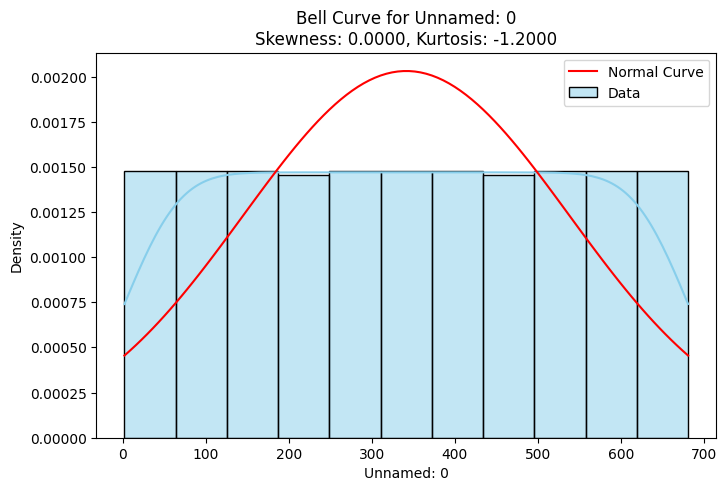

Column: DriverAhead
  Skewness: -0.6047
  Kurtosis: -1.0292


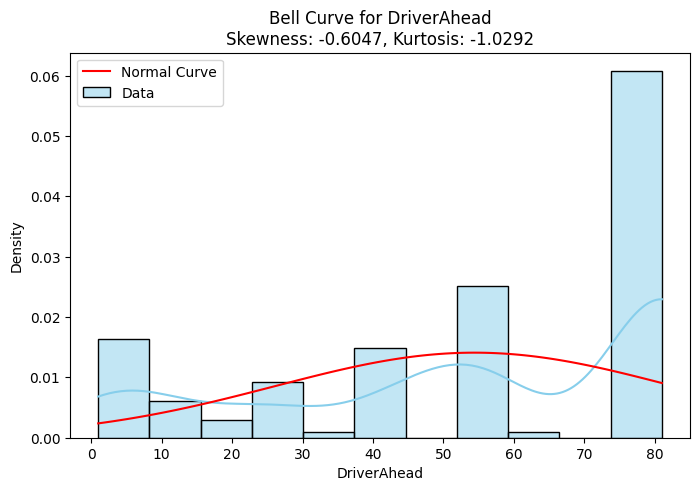

Column: DistanceToDriverAhead
  Skewness: 0.2324
  Kurtosis: -1.7164


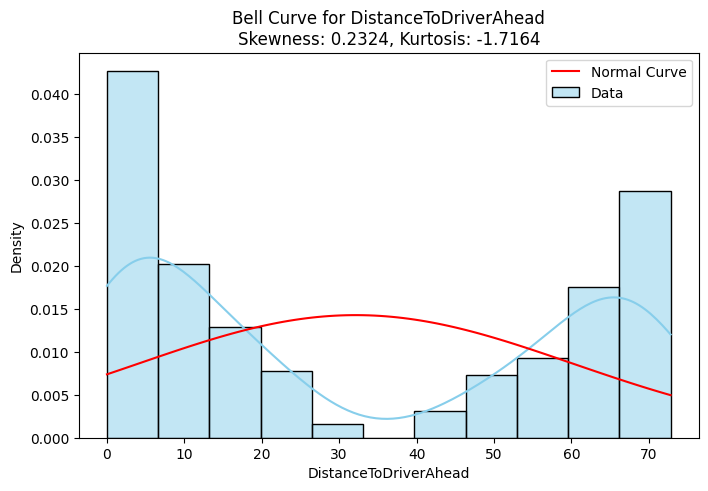

Column: RPM
  Skewness: -2.2815
  Kurtosis: 4.7801


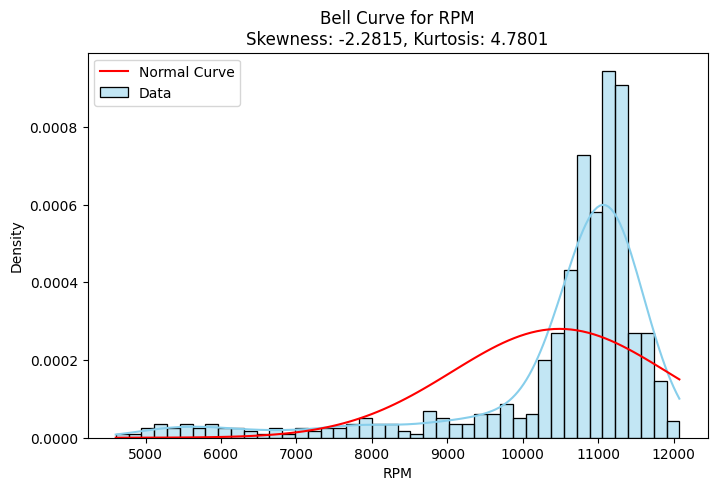

Column: Speed
  Skewness: -0.7220
  Kurtosis: -0.2309


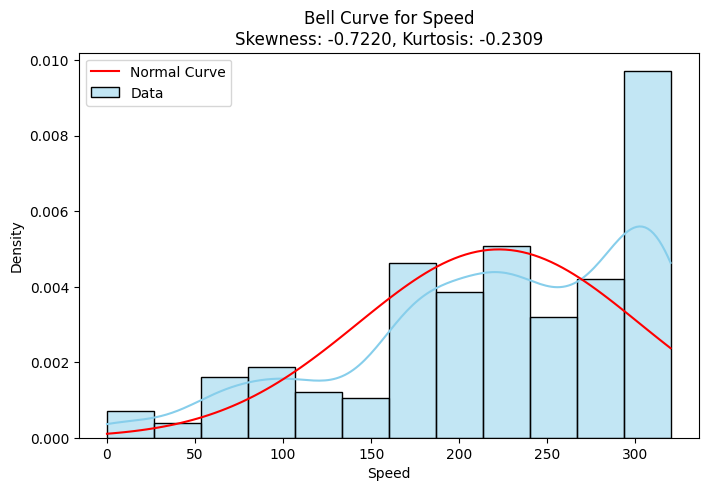

Column: nGear
  Skewness: -0.5423
  Kurtosis: -0.7348


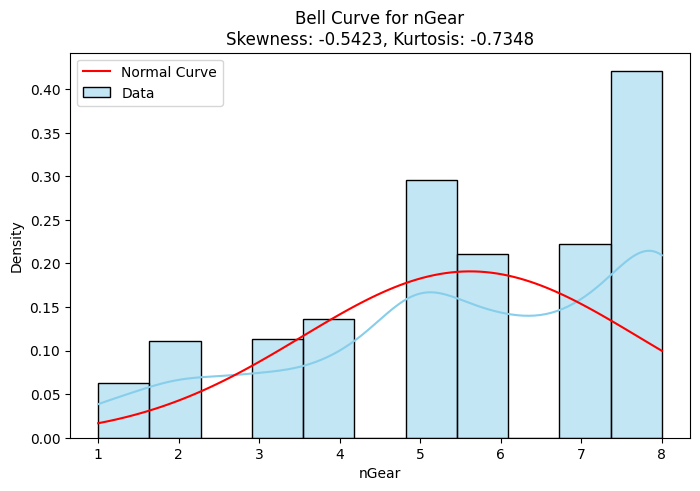

Column: Throttle
  Skewness: -1.0131
  Kurtosis: -0.7094


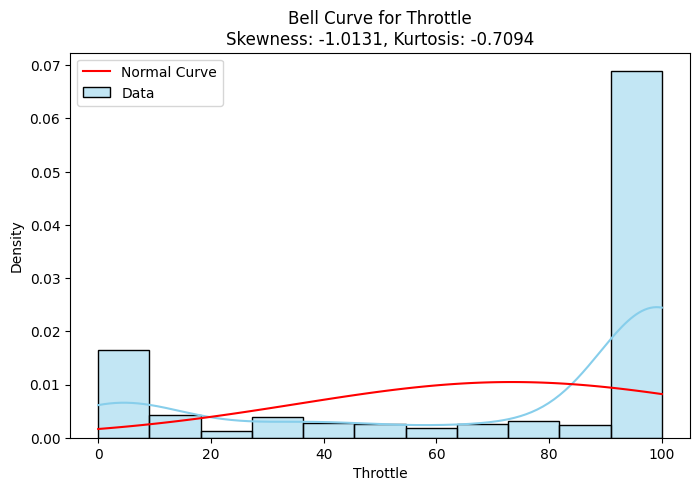

<ipython-input-26-68a8a6df7811>:18: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

<ipython-input-26-68a8a6df7811>:19: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Column: DRS
  Skewness: nan
  Kurtosis: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning:

invalid value encountered in divide



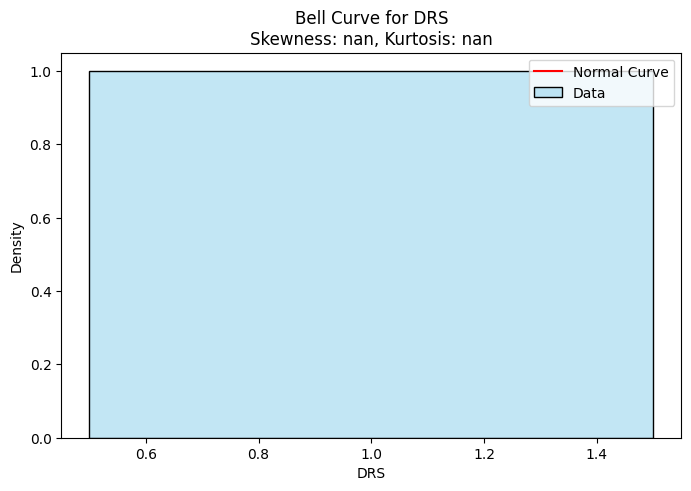

Column: Distance
  Skewness: 0.1637
  Kurtosis: -1.2089


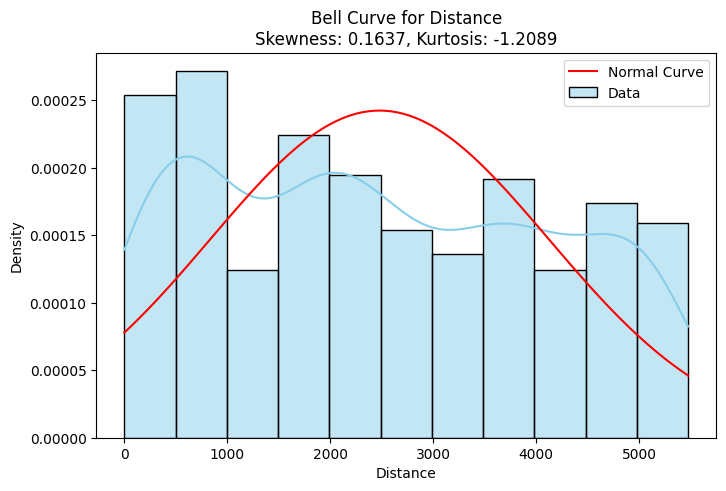

Column: RelativeDistance
  Skewness: 0.1637
  Kurtosis: -1.2089


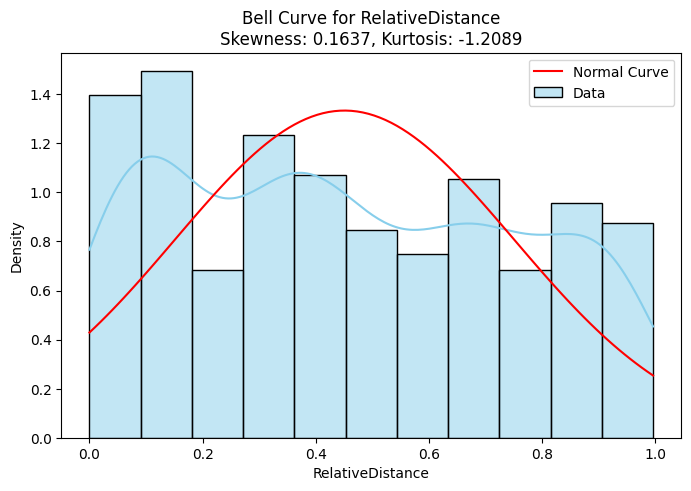

Column: X
  Skewness: 0.7376
  Kurtosis: -0.8674


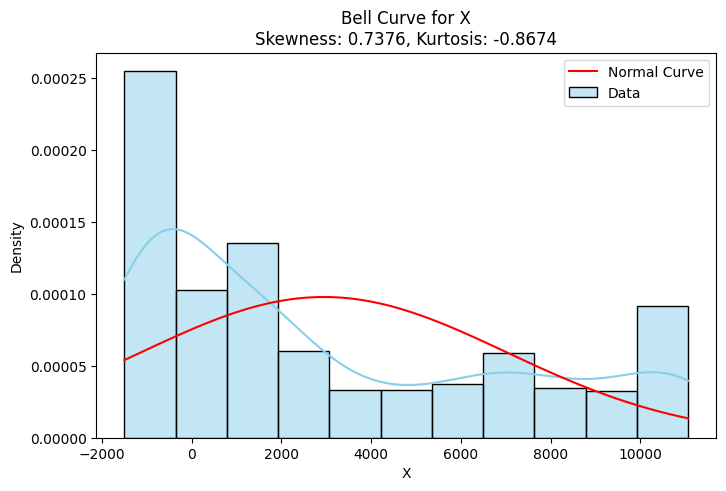

Column: Y
  Skewness: -0.4204
  Kurtosis: -1.0103


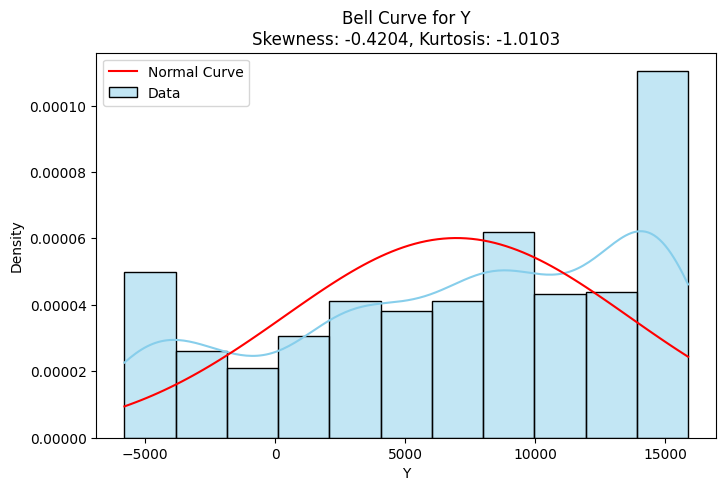

Column: Z
  Skewness: -0.2067
  Kurtosis: -0.9432


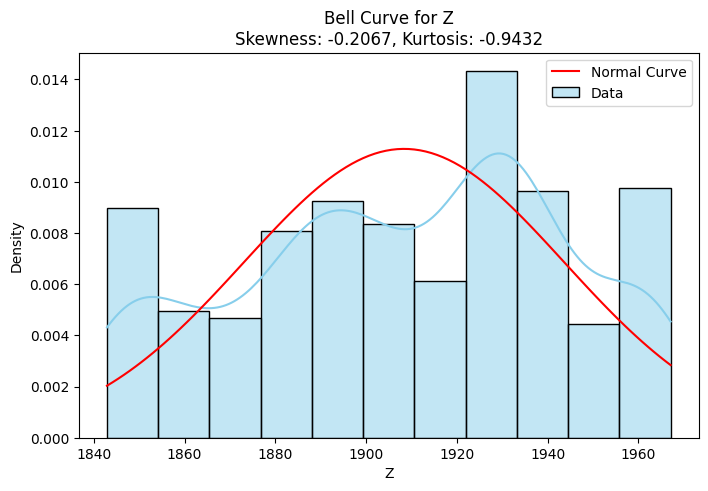

In [26]:
#test skewness, kurtosis and normality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

# Load your CSV file
file_path = 'telemetry.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select only numerical columns
numeric_data = data.select_dtypes(include=np.number)

# Iterate through each numeric column
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()

    # Calculate skewness and kurtosis
    col_skewness = skew(col_data)
    col_kurtosis = kurtosis(col_data)

    # Print skewness and kurtosis
    print(f"Column: {column}")
    print(f"  Skewness: {col_skewness:.4f}")
    print(f"  Kurtosis: {col_kurtosis:.4f}")

    # Plot bell curve
    plt.figure(figsize=(8, 5))
    sns.histplot(col_data, kde=True, stat="density", color="skyblue", label='Data')

    # Plot normal distribution for comparison
    mean = np.mean(col_data)
    std = np.std(col_data)
    x = np.linspace(min(col_data), max(col_data), 100)
    plt.plot(x, norm.pdf(x, mean, std), color="red", label='Normal Curve')

    plt.title(f'Bell Curve for {column}\nSkewness: {col_skewness:.4f}, Kurtosis: {col_kurtosis:.4f}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


In [5]:
#laps data
import pandas as pd

parse_timedelta = pd.to_timedelta
df = pd.read_csv('laps.csv', converters={'Time': parse_timedelta})
df.info()
#from this we can deduce that there are a lot of null values in this dataset
display(df.dtypes)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Unnamed: 0          1008 non-null   int64          
 1   Time                1008 non-null   timedelta64[ns]
 2   Driver              1008 non-null   object         
 3   DriverNumber        1008 non-null   int64          
 4   LapTime             1008 non-null   object         
 5   LapNumber           1008 non-null   float64        
 6   Stint               1008 non-null   float64        
 7   PitOutTime          30 non-null     object         
 8   PitInTime           31 non-null     object         
 9   Sector1Time         988 non-null    object         
 10  Sector2Time         1008 non-null   object         
 11  Sector3Time         1008 non-null   object         
 12  Sector1SessionTime  985 non-null    object         
 13  Sector2SessionTime  1008 non-null

,0
Unnamed: 0,int64
Time,timedelta64[ns]
Driver,object
DriverNumber,int64
LapTime,object
LapNumber,float64
Stint,float64
PitOutTime,object
PitInTime,object
Sector1Time,object


,Unnamed: 0,Time,DriverNumber,LapNumber,Stint,SpeedI1,SpeedI2,SpeedFL,SpeedST,TyreLife,TrackStatus,Position
count,1008.000000,1008,1008.000000,1008.000000,1008.000000,789.000000,1008.000000,977.000000,876.000000,1008.000000,1008.0,1008.000000
mean,503.500000,0 days 01:34:15.351083333,29.674603,26.685516,1.856151,314.610900,319.096230,312.377687,322.973744,12.872024,1.0,10.030754
std,291.128837,0 days 00:21:50.079105288,23.665017,15.283267,0.696239,6.687319,8.244866,2.605093,13.616309,8.895425,0.0,5.515893
min,0.000000,0 days 00:57:18.409000,1.000000,1.000000,1.000000,225.000000,213.000000,294.000000,247.000000,1.000000,1.0,1.000000
25%,251.750000,0 days 01:15:08.707750,11.000000,13.000000,1.000000,312.000000,315.000000,311.000000,319.000000,6.000000,1.0,5.000000
50%,503.500000,0 days 01:34:24.811000,23.000000,27.000000,2.000000,314.000000,317.000000,312.000000,323.000000,11.000000,1.0,10.000000
75%,755.250000,0 days 01:53:17.704000,44.000000,40.000000,2.000000,317.000000,322.000000,314.000000,329.000000,18.000000,1.0,15.000000
max,1007.000000,0 days 02:11:52.821000,81.000000,53.000000,4.000000,340.000000,343.000000,324.000000,357.000000,43.000000,1.0,20.000000


In [6]:
#null value inspection of laps data
import pandas as pd

parse_timedelta = pd.to_timedelta
df = pd.read_csv('laps.csv', converters={'Time': parse_timedelta})

df.shape #output = (1237, 32)
df[df.isna().any(axis=1)] #we are trying to see the null values in every column.
#PitInTime and PitOutTime are extremely crucial parameters, but have to be reformatted -> they have a lot of null values (as drivers will
#not pit at every lap)
#Deleted Reason has a lot of Nan values because only 5 laps have been deleted
#lot of nan values for drivers who retired mid-way through the race

,Unnamed: 0,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0,0 days 00:57:18.965000,LEC,16,0 days 00:01:28.179000,1.0,1.0,NaN,NaN,NaN,...,True,Ferrari,0 days 00:55:50.494000,2024-09-01 13:03:34.413,1,2.0,False,NaN,False,False
1,1,0 days 00:58:44.361000,LEC,16,0 days 00:01:25.396000,2.0,1.0,NaN,NaN,0 days 00:00:27.707000,...,True,Ferrari,0 days 00:57:18.965000,2024-09-01 13:05:02.884,1,2.0,False,NaN,False,True
2,2,0 days 01:00:09.540000,LEC,16,0 days 00:01:25.179000,3.0,1.0,NaN,NaN,0 days 00:00:27.679000,...,True,Ferrari,0 days 00:58:44.361000,2024-09-01 13:06:28.280,1,2.0,False,NaN,False,True
3,3,0 days 01:01:34.350000,LEC,16,0 days 00:01:24.810000,4.0,1.0,NaN,NaN,0 days 00:00:27.653000,...,True,Ferrari,0 days 01:00:09.540000,2024-09-01 13:07:53.459,1,2.0,False,NaN,False,True
4,4,0 days 01:02:58.953000,LEC,16,0 days 00:01:24.603000,5.0,1.0,NaN,NaN,0 days 00:00:27.630000,...,True,Ferrari,0 days 01:01:34.350000,2024-09-01 13:09:18.269,1,2.0,False,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,1003,0 days 01:00:20.224000,TSU,22,0 days 00:01:26.665000,3.0,1.0,NaN,NaN,0 days 00:00:27.756000,...,False,RB,0 days 00:58:53.559000,2024-09-01 13:06:37.478,1,15.0,False,NaN,False,True
1004,1004,0 days 01:01:46.422000,TSU,22,0 days 00:01:26.198000,4.0,1.0,NaN,NaN,0 days 00:00:27.631000,...,False,RB,0 days 01:00:20.224000,2024-09-01 13:08:04.143,1,15.0,False,NaN,False,True
1005,1005,0 days 01:03:18.663000,TSU,22,0 days 00:01:32.241000,5.0,1.0,NaN,NaN,0 days 00:00:28.736000,...,False,RB,0 days 01:01:46.422000,2024-09-01 13:09:30.341,1,19.0,True,TRACK LIMITS AT TURN 2 LAP 5,False,True
1006,1006,0 days 01:04:47.136000,TSU,22,0 days 00:01:28.473000,6.0,1.0,NaN,NaN,0 days 00:00:28.426000,...,False,RB,0 days 01:03:18.663000,2024-09-01 13:11:02.582,1,19.0,False,NaN,False,True


Column: Unnamed: 0
  Skewness: 0.0000
  Kurtosis: -1.2000


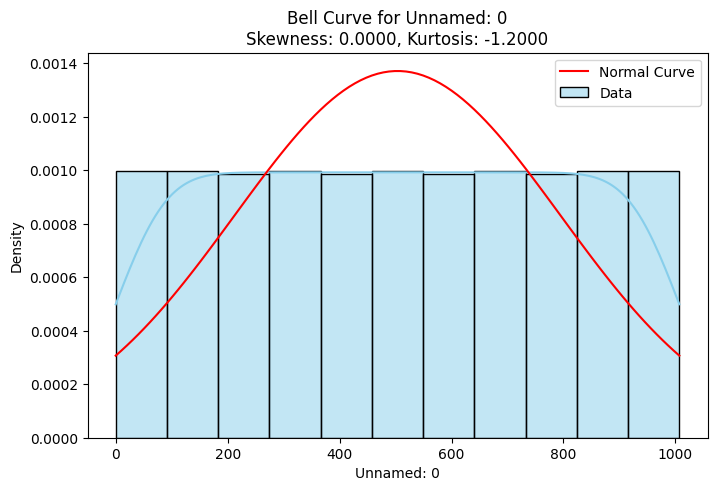

Column: DriverNumber
  Skewness: 0.8537
  Kurtosis: -0.3811


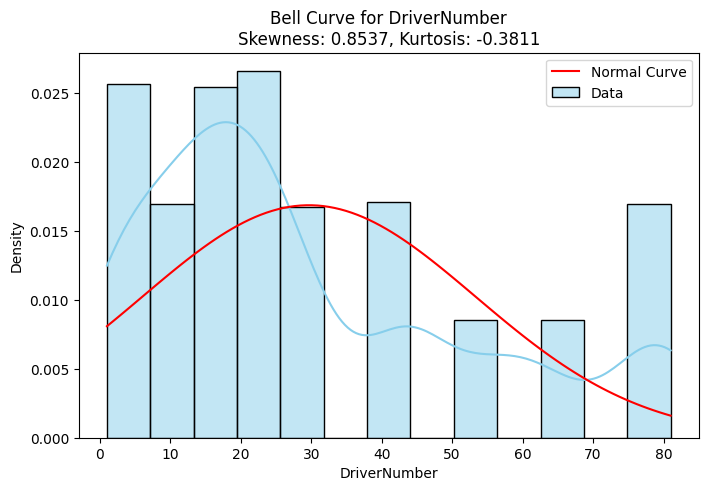

Column: LapNumber
  Skewness: 0.0082
  Kurtosis: -1.2071


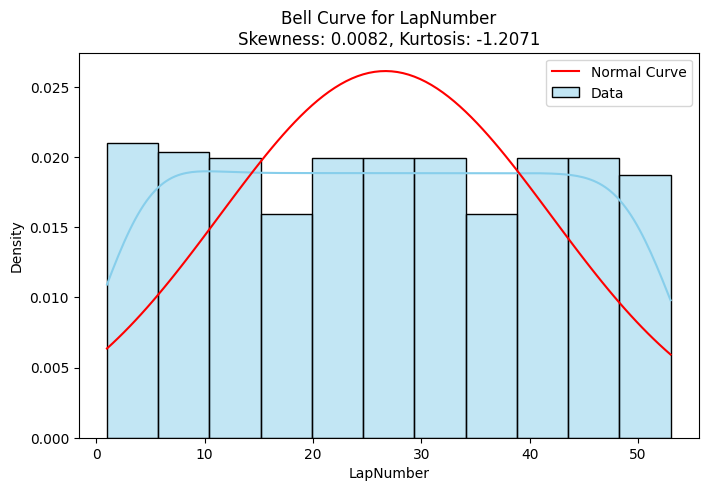

Column: Stint
  Skewness: 0.2374
  Kurtosis: -0.8071


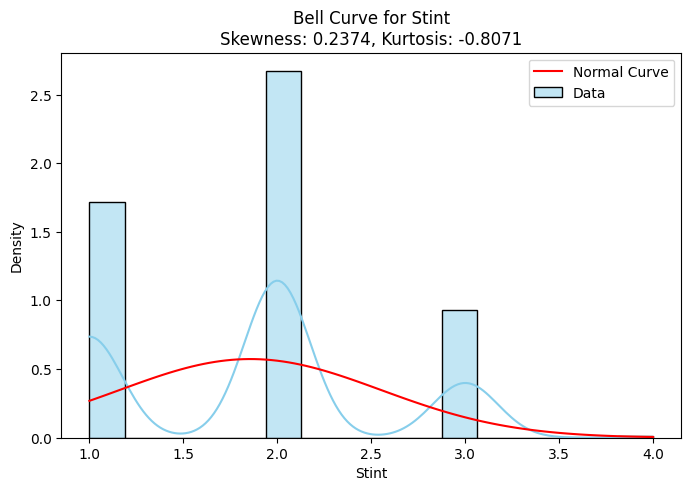

Column: SpeedI1
  Skewness: -4.1661
  Kurtosis: 54.0841


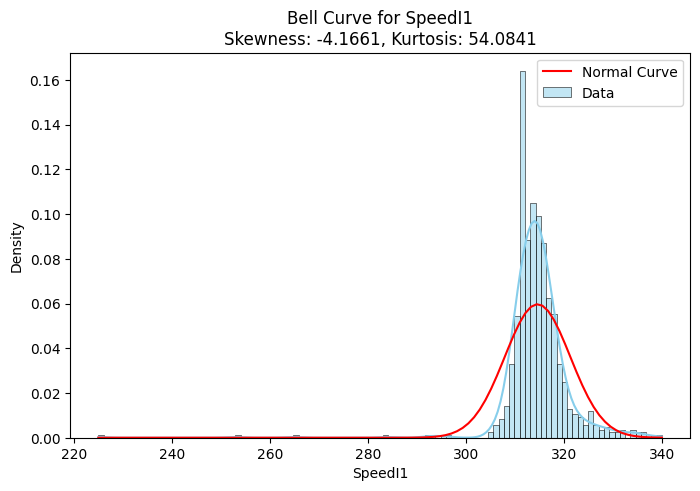

Column: SpeedI2
  Skewness: -2.4288
  Kurtosis: 32.8224


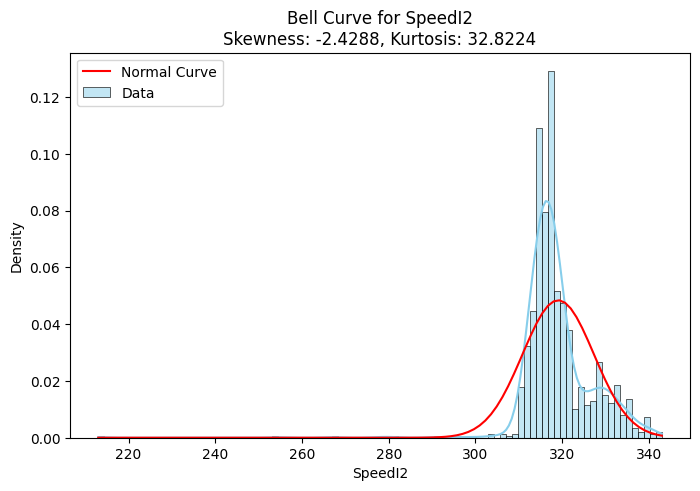

Column: SpeedFL
  Skewness: -0.3893
  Kurtosis: 4.1334


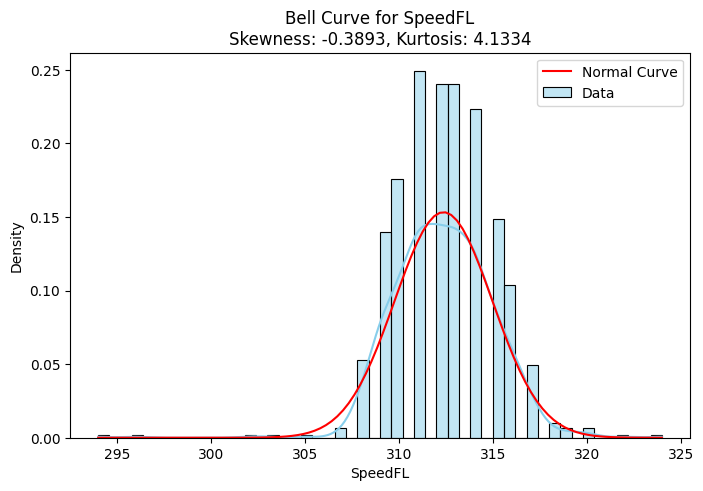

Column: SpeedST
  Skewness: -1.5964
  Kurtosis: 5.6367


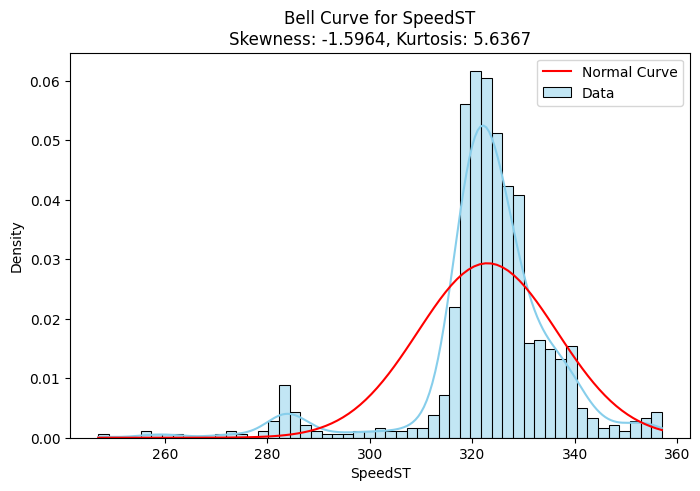

Column: TyreLife
  Skewness: 0.9096
  Kurtosis: 0.3382


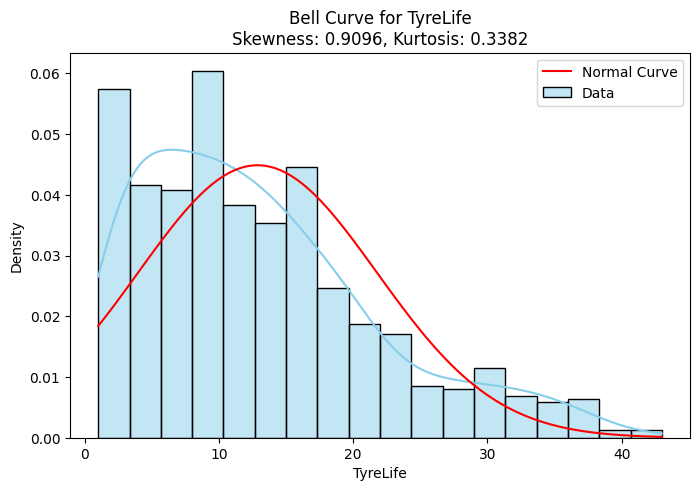

<ipython-input-27-ed7b8a215e29>:19: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

<ipython-input-27-ed7b8a215e29>:20: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning:

invalid value encountered in divide



Column: TrackStatus
  Skewness: nan
  Kurtosis: nan


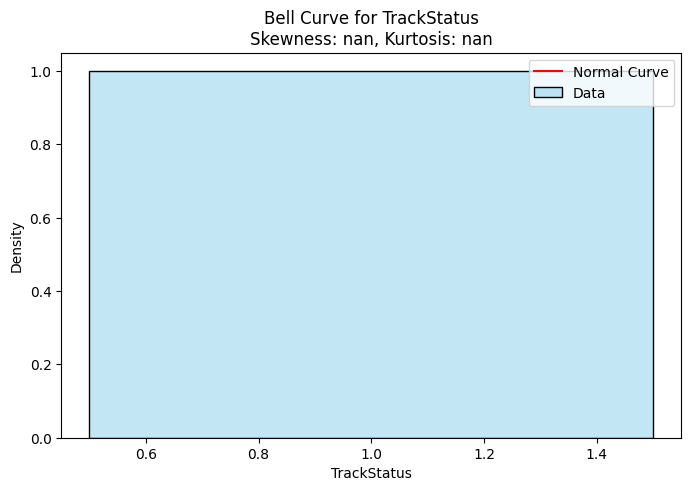

Column: Position
  Skewness: 0.0129
  Kurtosis: -1.1964


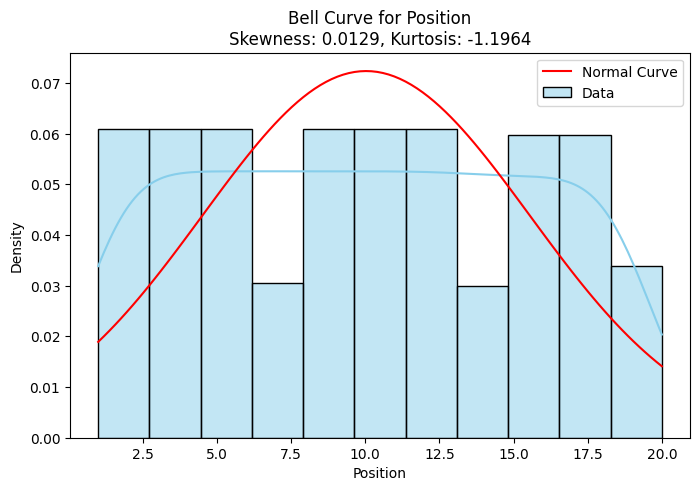

In [27]:
#test skewness, kurtosis and normality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

# Load your CSV file
file_path = 'laps.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Select only numerical columns
numeric_data = data.select_dtypes(include=np.number)

# Iterate through each numeric column
for column in numeric_data.columns:
    col_data = numeric_data[column].dropna()

    # Calculate skewness and kurtosis
    col_skewness = skew(col_data)
    col_kurtosis = kurtosis(col_data)

    # Print skewness and kurtosis
    print(f"Column: {column}")
    print(f"  Skewness: {col_skewness:.4f}")
    print(f"  Kurtosis: {col_kurtosis:.4f}")

    # Plot bell curve
    plt.figure(figsize=(8, 5))
    sns.histplot(col_data, kde=True, stat="density", color="skyblue", label='Data')

    # Plot normal distribution for comparison
    mean = np.mean(col_data)
    std = np.std(col_data)
    x = np.linspace(min(col_data), max(col_data), 100)
    plt.plot(x, norm.pdf(x, mean, std), color="red", label='Normal Curve')

    plt.title(f'Bell Curve for {column}\nSkewness: {col_skewness:.4f}, Kurtosis: {col_kurtosis:.4f}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()


Data cleaning

pick one driver only

* take out all laps data
* take out telemetry data of every point of time
* weather data for fixed time intervals already provided perfectly





Note: Handling of null values and missing data done during feature selection

In [7]:
import pandas as pd

df = pd.read_csv('laps.csv')
df_LEC = df[df['Driver']=='LEC']
df_LEC.to_csv('LEC_laps.csv')

In [8]:
import logging
import fastf1

logging.getLogger('fastf1').setLevel(logging.ERROR) #to suppress messages getting logged by fastf1 while loading the data into the cache
obj = fastf1.get_event(2024, 'Monza') #we are accessing the data for 2024 monza gp
obj1=obj.get_race() #accessing the race data (not quali or fp)
obj1.load(laps=True, telemetry=True, weather=True, messages=True, livedata=None)

#only extracting leclerc's telemetry data
lec = obj1.laps.pick_driver('LEC')
telemetry = lec.get_telemetry()

telemetry.to_csv('LEC_telemetry.csv', index=False)

/usr/local/lib/python3.10/dist-packages/fastf1/core.py:3022: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


Data integration

* We now have to select the most relevant features from LEC_laps.csv, LEC_telemetry.csv and weather.csv that contributed to his result.
* We will then put all the info in one place in a LEC_data.csv file

Step 1: Feature selection

Weather

<Axes: >

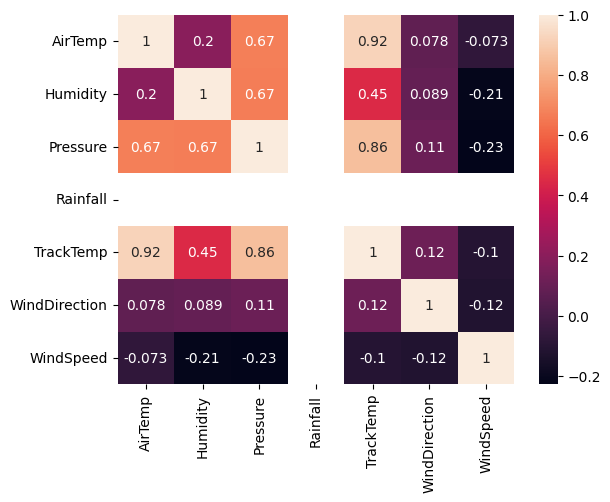

In [9]:
#weather data - unsupervised feature selection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#used correlation feature extraction method as data is numerical-numerical

df = pd.read_csv('weather.csv')
df_sub = df.iloc[:,2:] #accessing all columns except the first (time data)
sns.heatmap(df_sub.corr(), annot=True)

In [10]:
#weather data - supervised feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

df_weather = pd.read_csv('weather.csv')
df_sub_weather= df_weather.iloc[:,2:] #accessing all columns except the first (time data)

df_laps = pd.read_csv('LEC_laps.csv') #the target variable is in this file, i.e. position in every lap

#the number of rows in the weather dataset is not the same as that in laps dataset because the weather
#recorded at fixed time intervals of 1 minute, whereas the time recorded in the laps data was at the start of every lap.
#so we need to interpolate some data into the weather ka time column so as to make the length of our input variables and target variable same
df_weather['Time'] = pd.to_timedelta(df_weather['Time'])
df_laps['Time'] = pd.to_timedelta(df_laps['Time'])

'''
1.Set the Index: df_weather.set_index('Time') sets the Time column in df_weather as the index,
creating a TimedeltaIndex for precise alignment with df_laps.

2.Reindex with Nearest Method: .reindex(df_laps['LapStartTime'], method='nearest') aligns the weather data to the timestamps in
df_laps['LapStartTime']. The method='nearest' option chooses the closest weather data point for each lap time.
For example, if a lap started at 00:10:30, it will find the nearest timestamp in df_weather['Time'],
even if it's slightly before or after.'''

weather_interpolated = df_weather.set_index('Time').reindex(df_laps['LapStartTime'], method='nearest')

'''1. Reset the Index: reset_index() removes the current index (which, in this case, is the TimedeltaIndex created from Time) and
replaces it with a default integer index (0, 1, 2, ...).

2. drop=True: drop=True means that the old index (the original Time column) will not be added back as a separate column in the dataframe.
It’s simply discarded.

3. inplace=True: inplace=True applies the changes directly to weather_interpolated, rather than creating a new dataframe.'''

weather_interpolated.reset_index(drop=True, inplace=True)


#feature selection steps
lr = LogisticRegression(class_weight='balanced', solver = 'lbfgs', random_state = 42, n_jobs = -1, max_iter = 500)
lr.fit(weather_interpolated, df_laps['Position'])

ffs = SequentialFeatureSelector(lr, k_features = 'best', forward = True, n_jobs = -1)
ffs.fit(weather_interpolated, df_laps['Position'])
print(ffs.k_feature_names_)

('AirTemp', 'TrackTemp', 'WindSpeed')


Laps

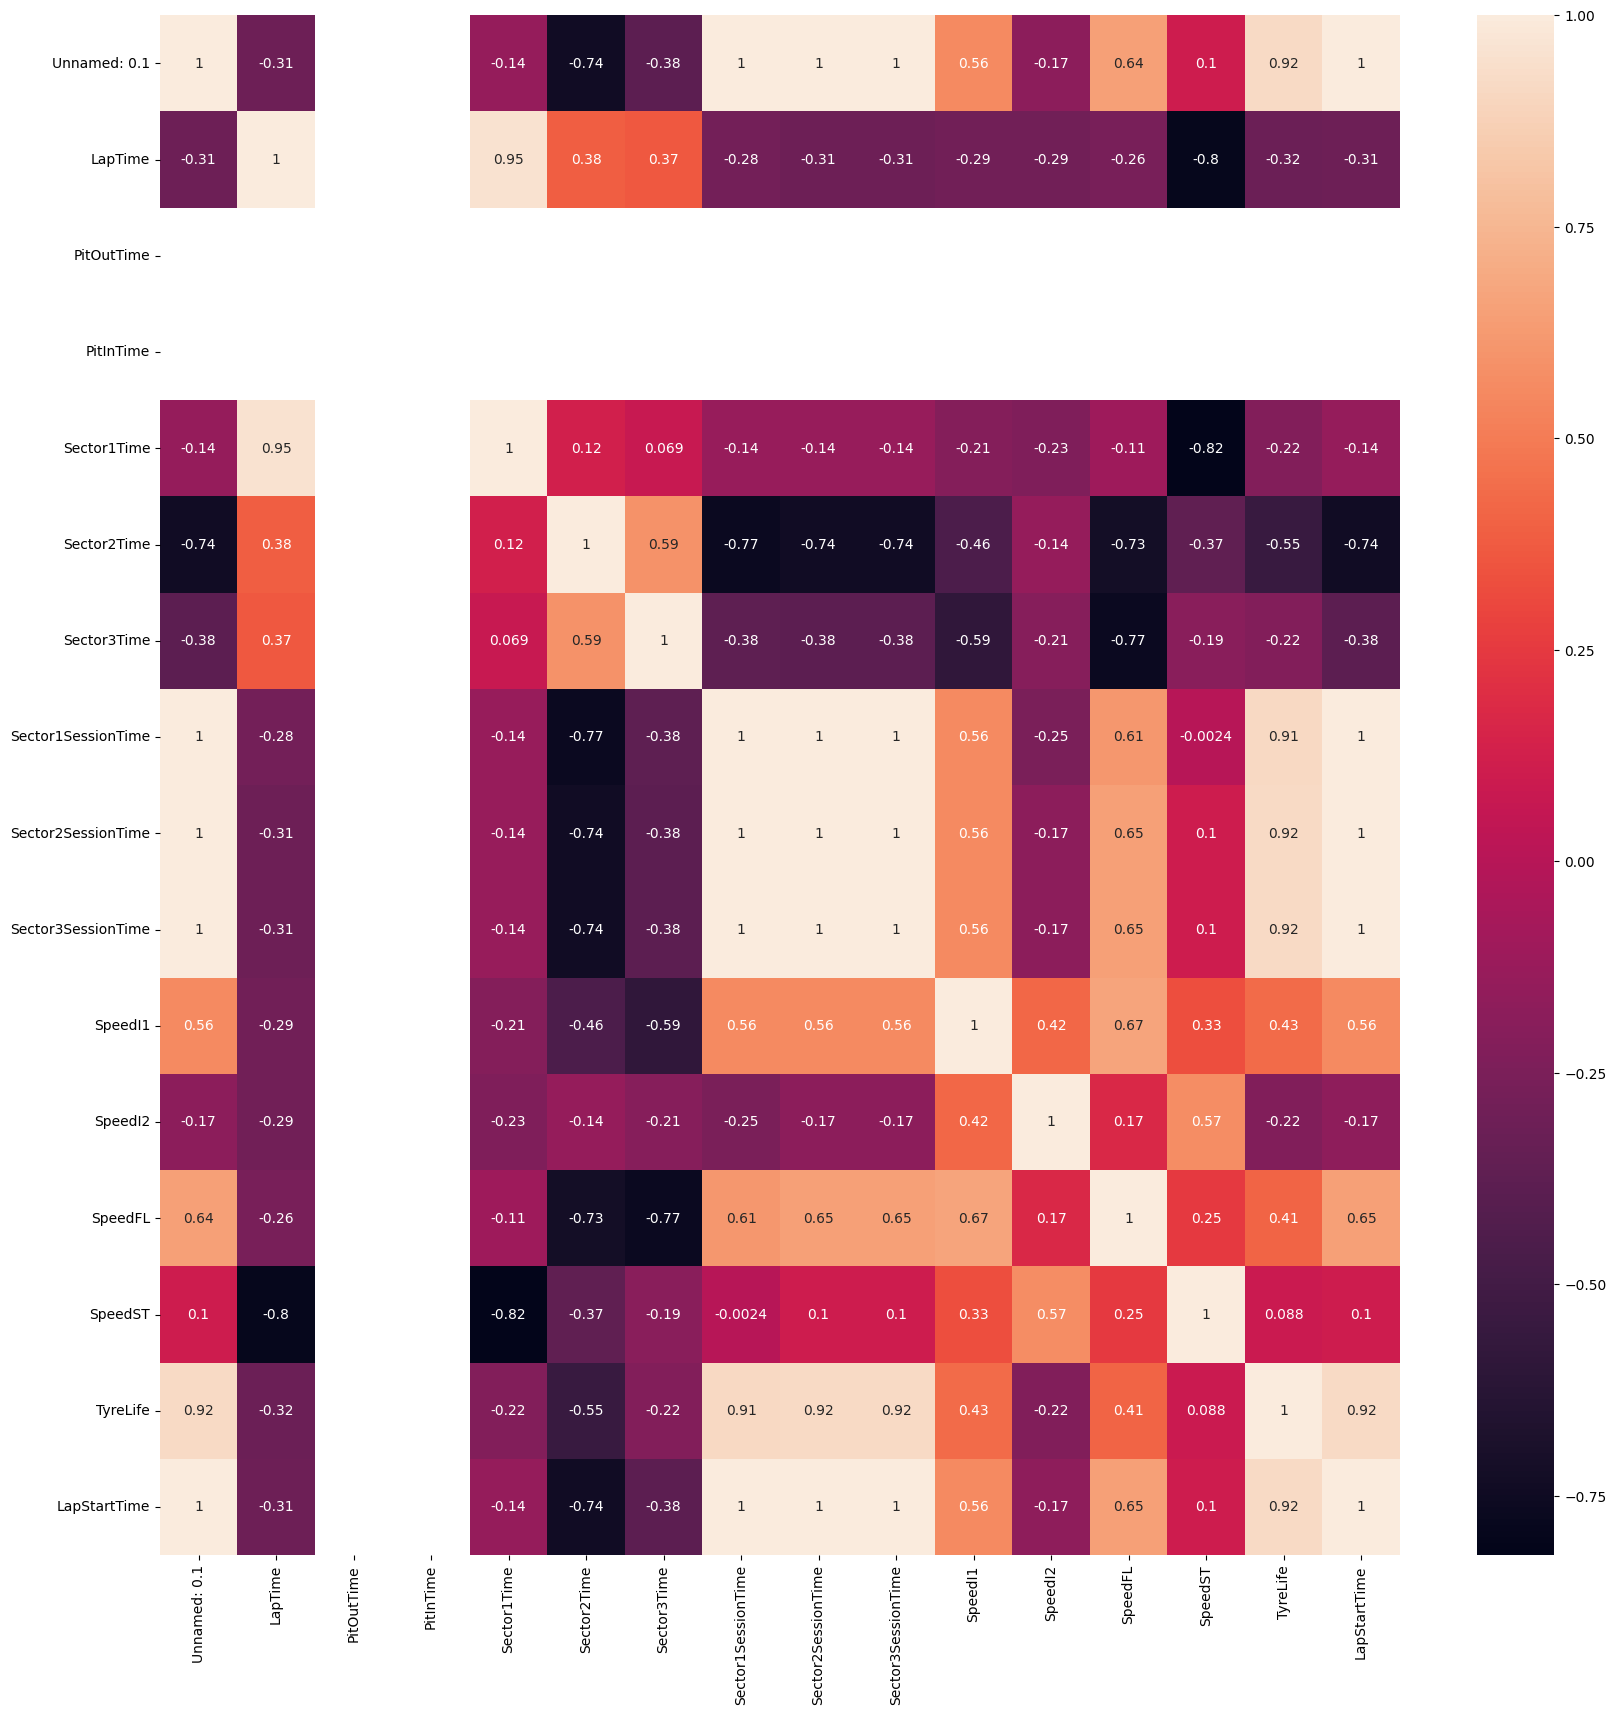

In [11]:
#laps data - unsupervised feature selection
#Numerical-Numerical

#Numerical variables = ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'Speedl1', 'Speedl2', 'SpeedFL', 'SpeedST', 'TyreLife', 'LapStartTime']
#Not important = ['Unnamed: 0', 'Driver', 'DriverNumber','Time', 'LapNumber', 'Team', 'LapStartDate', 'TrackStatus', 'DeletedReason', 'FastF1Generated', 'IsAccurate']
#Categorical = ['Stint', 'IsPersonalBest', 'Compound', 'FreshTyre', 'Position', 'Deleted']

#ANALYSIS ONLY OF NON-PITSTOP LAPS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('LEC_laps.csv')
df.drop(columns=['Unnamed: 0', 'Driver', 'DriverNumber','Time', 'LapNumber', 'Team', 'LapStartDate', 'TrackStatus', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'Stint', 'IsPersonalBest', 'Compound', 'FreshTyre', 'Position', 'Deleted'], inplace = True)


for col in df.columns:
    try:
        df[col] = pd.to_timedelta(df[col])
        df[col] = df[col].dt.total_seconds() #convert timedelta data to numerical type to find out correlation
    except (TypeError,ValueError): #arises if it is not timedelta data. meaning they are numeric or boolean
        pass

plt.figure(1, figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

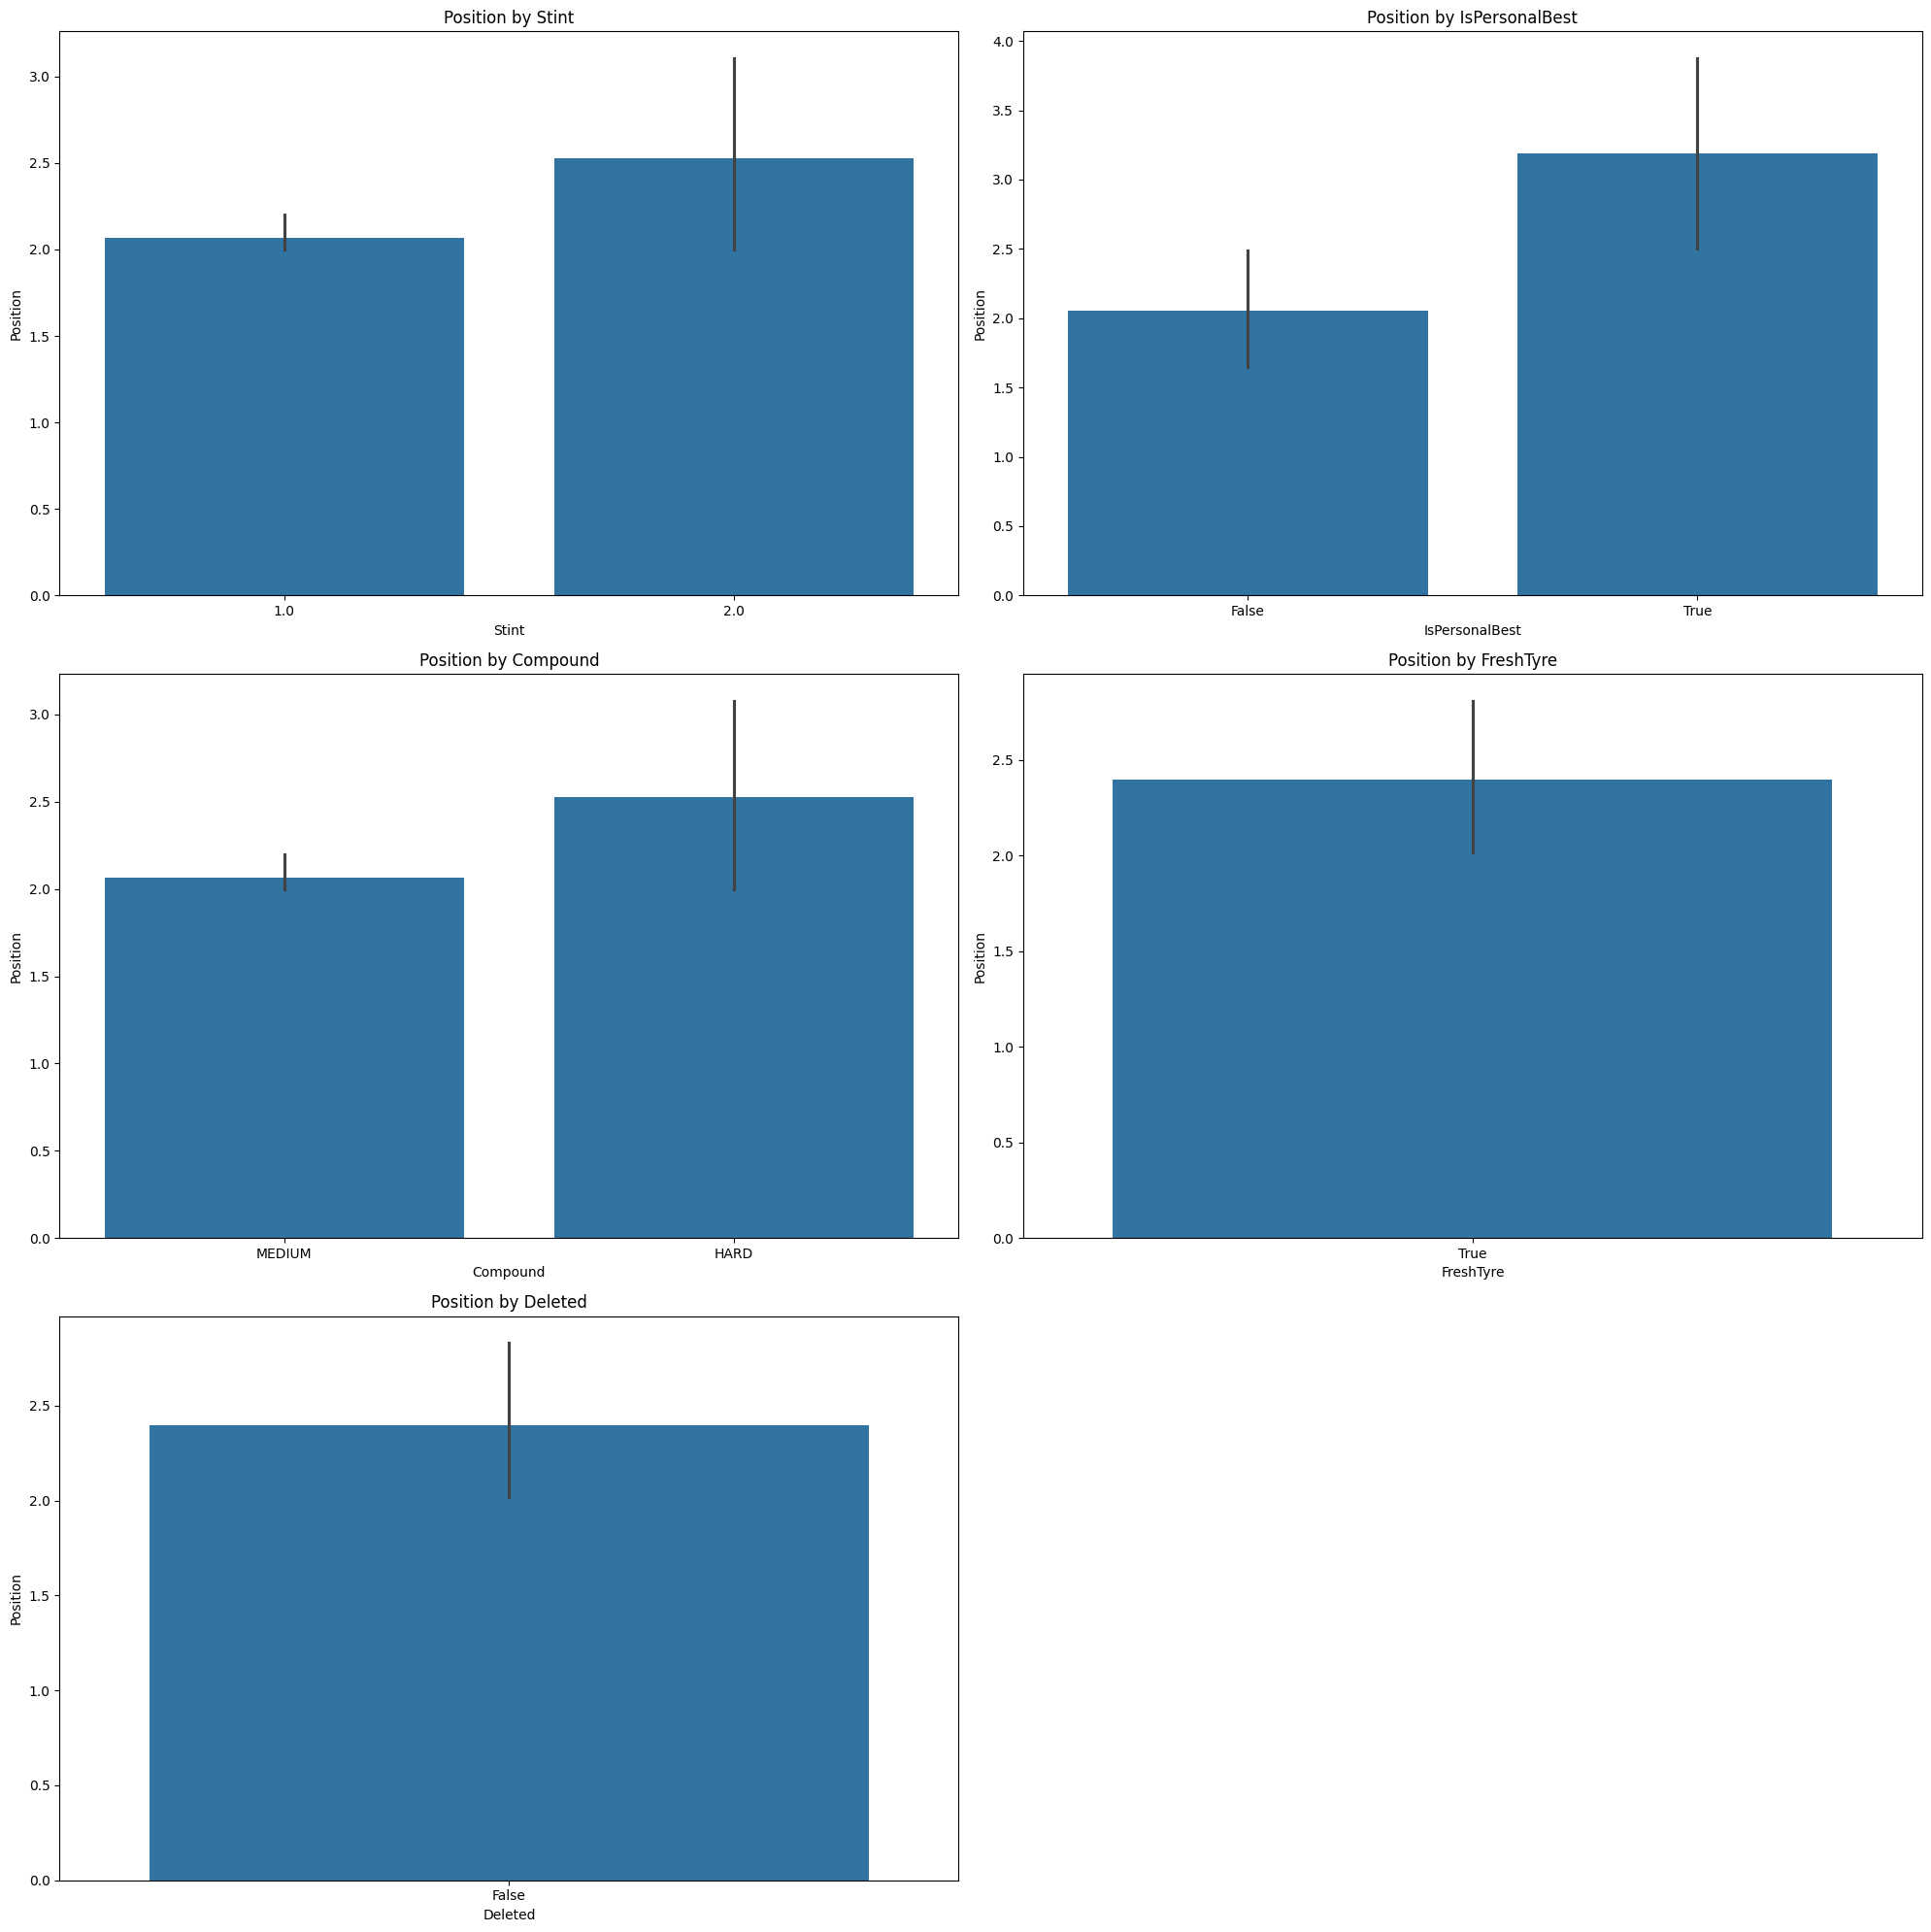

In [12]:
#laps data - unsupervised feature selection
#Categorical-Categorical

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('LEC_laps.csv')
df.drop(columns=['Unnamed: 0', 'Driver', 'DriverNumber', 'Time', 'LapNumber', 'Team', 'LapStartDate',
                 'TrackStatus', 'DeletedReason', 'FastF1Generated', 'IsAccurate', 'LapTime',
                 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime',
                 'Sector3SessionTime', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'TyreLife', 'LapStartTime'], inplace=True)

categorical_columns = ['Stint', 'IsPersonalBest', 'Compound', 'FreshTyre', 'Deleted']

#plotting barplots of parameter vs. position to check how each affects the position of the driver
plt.figure(figsize=(20, 20))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=df, x=column, y='Position')
    plt.title(f"Position by {column}")
    plt.xlabel(column)
    plt.ylabel("Position")

plt.tight_layout()
plt.show()


In [13]:
#pitstop laps analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv('LEC_laps.csv')

# Shift PitOutTime to align with the corresponding PitInTime in the previous row
df['PitOutTime_Shifted'] = df['PitOutTime'].shift(-1)

# Calculate pit stop time for laps with a pit stop
# PitStopTime will be NaN for laps without a pit stop
df['PitStopTime'] = (pd.to_timedelta(df['PitOutTime_Shifted']) - pd.to_timedelta(df['PitInTime'])).dt.total_seconds()
print (df['PitStopTime'].iloc[14]) #pitstop was on 14th lap


24.419


In [14]:
#laps data feature selection - supervised
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('LEC_laps.csv')

# Step 1: Preprocess Timedelta Columns (Convert to Total Seconds)
timedelta_columns = ['LapTime', 'LapStartTime',
                     'Sector1Time', 'Sector2Time', 'Sector3Time',
                     'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime']

for col in timedelta_columns:
    df[col] = pd.to_timedelta(df[col], errors='coerce').dt.total_seconds()

# Step 2: Preprocess Numerical Variables (Convert to Numeric and Handle NaNs)
numerical_columns = ['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
                     'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                     'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'TyreLife']#this last row are numeric data in the original dataset too

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Step 3: Handle Categorical Variables (One-Hot Encoding)
categorical_columns = ['Stint', 'IsPersonalBest', 'Compound', 'FreshTyre', 'Deleted']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 4: Exclude Non-Important Variables
non_important_columns = ['Unnamed: 0', 'Driver', 'DriverNumber', 'LapNumber',
                         'Team', 'LapStartDate', 'TrackStatus', 'DeletedReason',
                         'FastF1Generated', 'IsAccurate']
df = df.drop(columns=non_important_columns)

# Step 5: Handle Missing Values (Using SimpleImputer) (more robust than fillna())

X = df.drop(columns=['Position']) #target variable

# Ensure all columns are numeric
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_timedelta(X[col], errors='coerce').dt.total_seconds()

# Convert any remaining object columns to numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Impute missing values
imputer = SimpleImputer(strategy='mean')


X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = df['Position']

# Step 6: Standardize Numerical Features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Define the Model
model = LinearRegression()

# Step 9: Perform Forward Feature Selection
selector = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')
selector.fit(X_train, y_train)

# Step 10: Get the Selected Features
selected_features = X_train.columns[selector.get_support()]
print("Selected Features: ", selected_features)

# Step 11: Evaluate Model Performance with Selected Features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model using selected features
model.fit(X_train_selected, y_train)

# Predict using the test set
y_pred = model.predict(X_test_selected)

# Evaluate the performance (R-squared, Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

'''
Selected Features:  Index(['Unnamed: 0.1', 'LapTime', 'PitOutTime', 'PitInTime',
       'Sector1SessionTime', 'Sector3SessionTime', 'TyreLife', 'Stint_2.0',
       'Compound_MEDIUM'],

Stint_2.0 is the One-hot encoded variable of the catgorical variable Stint. In One-hot encoding, the different categories of a varible are
converted into variables themselves.
Same for Compound_MEDIUM
What this tells us is that when the driver switched to Medium tyres, his chances of winning the race got better'''

df.to_csv('LEC_laps_newfeatures.csv')

Selected Features:  Index(['Unnamed: 0.1', 'LapTime', 'PitOutTime', 'PitInTime',
       'Sector1SessionTime', 'Sector3SessionTime', 'TyreLife', 'Stint_2.0',
       'IsPersonalBest_True', 'Compound_MEDIUM'],
      dtype='object')
Mean Squared Error: 0.37406973533677945
R-squared: 0.8539921355620957


Telemetry

In [15]:
cat = ['Brake', 'Status']
num = ['DistanceToDriverAhead', 'RPM', 'Speed', 'Distance', 'RelativeDistance', 'X', 'Y', 'Z','nGear', 'Throttle', 'DRS']

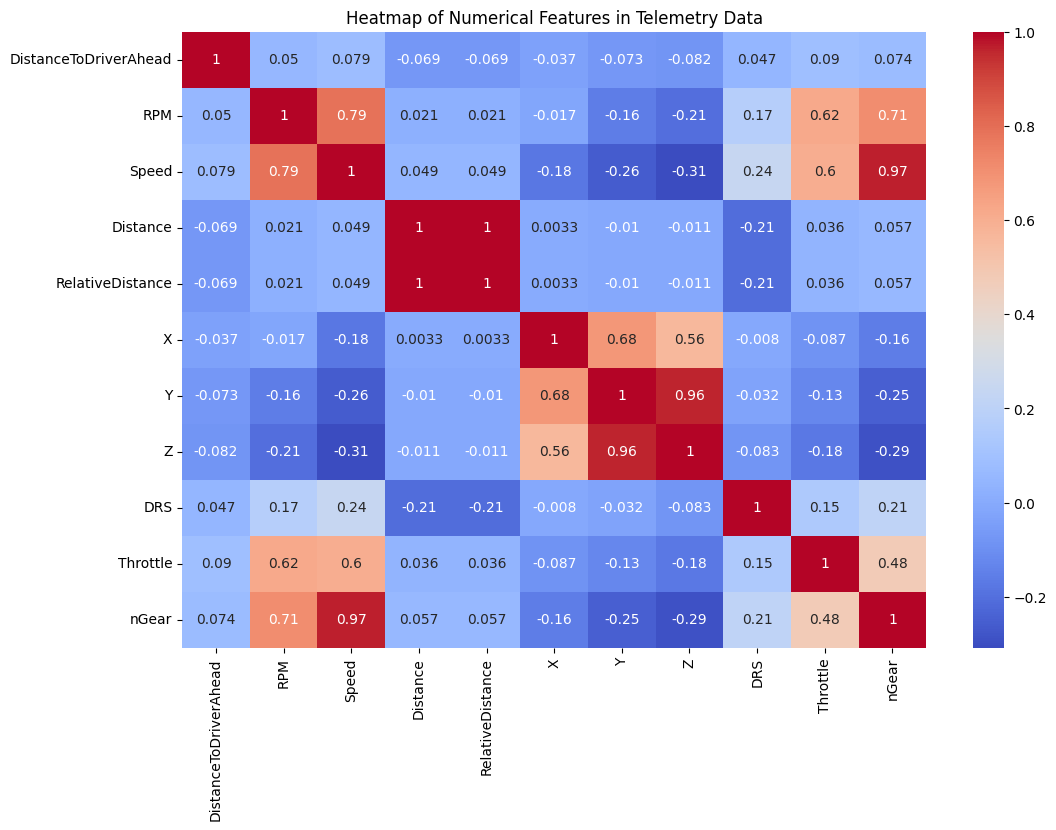

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load Data
telemetry_df = pd.read_csv('LEC_telemetry.csv')
laps_df = pd.read_csv('LEC_laps.csv')

# Step 2: Select Categorical and Numerical Columns
cat_columns = ['Brake', 'Status']
num_columns = ['DistanceToDriverAhead', 'RPM', 'Speed', 'Distance',
               'RelativeDistance', 'X', 'Y', 'Z', 'DRS', 'Throttle', 'nGear']

# Drop any columns not mentioned in 'cat' or 'num'
telemetry_df = telemetry_df[cat_columns + num_columns + ['Time']]

# Step 3: Map Telemetry Data to Laps Data (based on closest timestamps)
laps_df['LapStartTime'] = pd.to_timedelta(laps_df['LapStartTime'], errors='coerce').dt.total_seconds()
telemetry_df['Time'] = pd.to_timedelta(telemetry_df['Time'], errors='coerce').dt.total_seconds()

# Drop rows with NaNs in 'Time'
telemetry_df = telemetry_df.dropna(subset=['Time'])

# Align telemetry data with laps data based on closest LapStartTime
def map_to_closest_lap(time, lap_times):
    return lap_times.iloc[(lap_times - time).abs().argmin()]

# Map each telemetry timestamp to the closest LapStartTime
telemetry_df['MappedLapStartTime'] = telemetry_df['Time'].apply(
    lambda t: map_to_closest_lap(t, laps_df['LapStartTime'])
)

# Merge telemetry data with laps data on mapped LapStartTime
merged_df = pd.merge(telemetry_df, laps_df[['LapStartTime', 'Position']],
                     left_on='MappedLapStartTime', right_on='LapStartTime', how='inner')

# Drop the mapping columns after merging
merged_df = merged_df.drop(columns=['MappedLapStartTime', 'LapStartTime', 'Time'])

# Step 4: One-Hot Encoding for Categorical Variables
merged_df = pd.get_dummies(merged_df, columns=cat_columns, drop_first=True)

# Step 5: Unsupervised Analysis (Bar Plot for Categorical, Heatmap for Numerical)

# Heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(merged_df[num_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Features in Telemetry Data')
plt.show()


In [17]:

# Step 6: Supervised Feature Selection (Forward Feature Selection)
X = merged_df.drop(columns=['Position'])
y = merged_df['Position']

# Standardize the numerical features
scaler = StandardScaler()
X[num_columns] = scaler.fit_transform(X[num_columns])

# Define Linear Regression Model
model = LinearRegression()

# Perform Forward Feature Selection
selector = SequentialFeatureSelector(model, n_features_to_select='auto', direction='forward')
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]
print("Selected Features for Supervised Learning: ", selected_features)

# Step 7: Model Evaluation with Selected Features
X_selected = X[selected_features]
model.fit(X_selected, y)
y_pred = model.predict(X_selected)

# Evaluate performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Selected Features for Supervised Learning:  Index(['DistanceToDriverAhead', 'RPM', 'Speed', 'Distance', 'RelativeDistance',
       'X'],
      dtype='object')
Mean Squared Error: 0.0
R-squared: 1.0


Therefore, Important features defining the driver's position are:

* Laps - 'LapTime', 'PitOutTime', 'PitInTime', 'Sector1SessionTime', 'Sector3SessionTime', 'TyreLife', 'Stint_2.0', 'Compound_MEDIUM'

* Weather - ('AirTemp', 'TrackTemp', 'WindSpeed')

* Telemetry - 'DistanceToDriverAhead', 'RPM', 'Speed', 'Distance', 'RelativeDistance', 'X'

Step 2: Data Integration

In [18]:
import pandas as pd

df_laps = pd.read_csv('LEC_laps_newfeatures.csv', usecols=['Time', 'LapTime', 'PitOutTime', 'PitInTime', 'Sector1SessionTime', 'Sector3SessionTime', 'TyreLife', 'Stint_2.0', 'Compound_MEDIUM'])
df_weather = pd.read_csv('weather.csv', usecols=['Time','AirTemp', 'TrackTemp', 'WindSpeed' ])
df_telemetry = pd.read_csv('LEC_telemetry.csv', usecols=['SessionTime', 'DistanceToDriverAhead', 'RPM', 'Speed', 'Distance', 'RelativeDistance', 'X'])

for i in range (len(df_laps)):
  n=0
  j=0

  airtemp=0;
  tracktemp=0;
  windspeed=0;

  while df_weather['Time'][j]<=df_laps['Time'][i]:
    airtemp+=df_weather['AirTemp']
    tracktemp+=df_weather['TrackTemp']
    windspeed+=df_weather['WindSpeed']
    n+=1
    j+=1

  df_laps['AirTemp']=airtemp/n
  df_laps['TrackTemp']=tracktemp/n
  df_laps['WindSpeed']=windspeed/n


j = 0
for i in range(len(df_laps)):
    n = 0
    distancetodriverahead = rpm = speed = 0

    # Aggregate telemetry data
    while j < len(df_telemetry) and df_telemetry['SessionTime'][j] <= df_laps['Time'][i]:
        distancetodriverahead += df_telemetry['DistanceToDriverAhead'][j]
        rpm += df_telemetry['RPM'][j]
        speed += df_telemetry['Speed'][j]
        n += 1
        j += 1

    if n > 0:
        df_laps.loc[i, 'DistanceToDriverAhead'] = distancetodriverahead / n
        df_laps.loc[i, 'RPM'] = rpm / n
        df_laps.loc[i, 'Speed'] = speed / n


df_laps.to_csv('LEC_data_complete.csv')


In [19]:
import pandas as pd

# Load the LEC_laps.csv which contains the 'position' column
df = pd.read_csv('LEC_laps.csv', usecols=['Time', 'Position'])

# Merge the 'position' column into df_laps using 'Time' as the key
df_laps = pd.merge(df_laps, df[['Time', 'Position']], on='Time', how='left')

# Save the updated DataFrame
df_laps.to_csv('LEC_data_complete.csv', index=False)


Multivariate Data Visualisation

In [20]:
import pandas as pd

df = pd.read_csv('LEC_data_complete.csv' ,index_col=0)
print(df.shape)

(53, 15)


Parallel coordinates plot

In [21]:
import plotly.express as px
fig = px.parallel_coordinates(df)
fig.show()


Spider Chart

In [22]:
import plotly.graph_objects as go

fig = go.Figure()
for index, row in df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row.values,
        theta=df.columns,
        fill='toself'
    ))
fig.show()

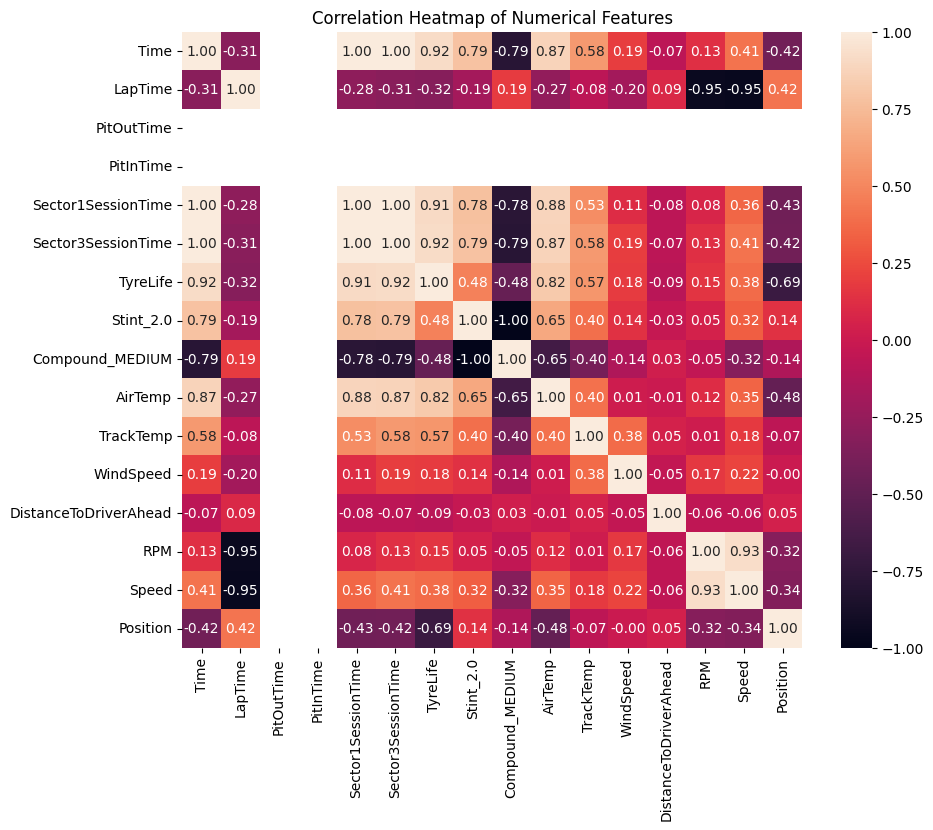

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and convert 'Time', 'PitInTime', and 'PitOutTime' columns from timedelta format to seconds
parse_timedelta = pd.to_timedelta
df = pd.read_csv('LEC_data_complete.csv', converters={'Time': parse_timedelta, 'PitOutTime': parse_timedelta, 'PitInTime': parse_timedelta})

# Ensure all timedelta columns are converted to seconds
for col in df.select_dtypes(include=['timedelta']).columns:
    df[col] = df[col].dt.total_seconds()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


Comparison with LLM

In [28]:
import pandas as pd

df = pd.read_csv('LEC_data_complete.csv')

print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   53 non-null     object 
 1   LapTime                53 non-null     float64
 2   PitOutTime             1 non-null      object 
 3   PitInTime              1 non-null      object 
 4   Sector1SessionTime     51 non-null     float64
 5   Sector3SessionTime     53 non-null     float64
 6   TyreLife               53 non-null     float64
 7   Stint_2.0              53 non-null     bool   
 8   Compound_MEDIUM        53 non-null     bool   
 9   AirTemp                53 non-null     float64
 10  TrackTemp              53 non-null     float64
 11  WindSpeed              53 non-null     float64
 12  DistanceToDriverAhead  53 non-null     float64
 13  RPM                    53 non-null     float64
 14  Speed                  53 non-null     float64
 15  Position

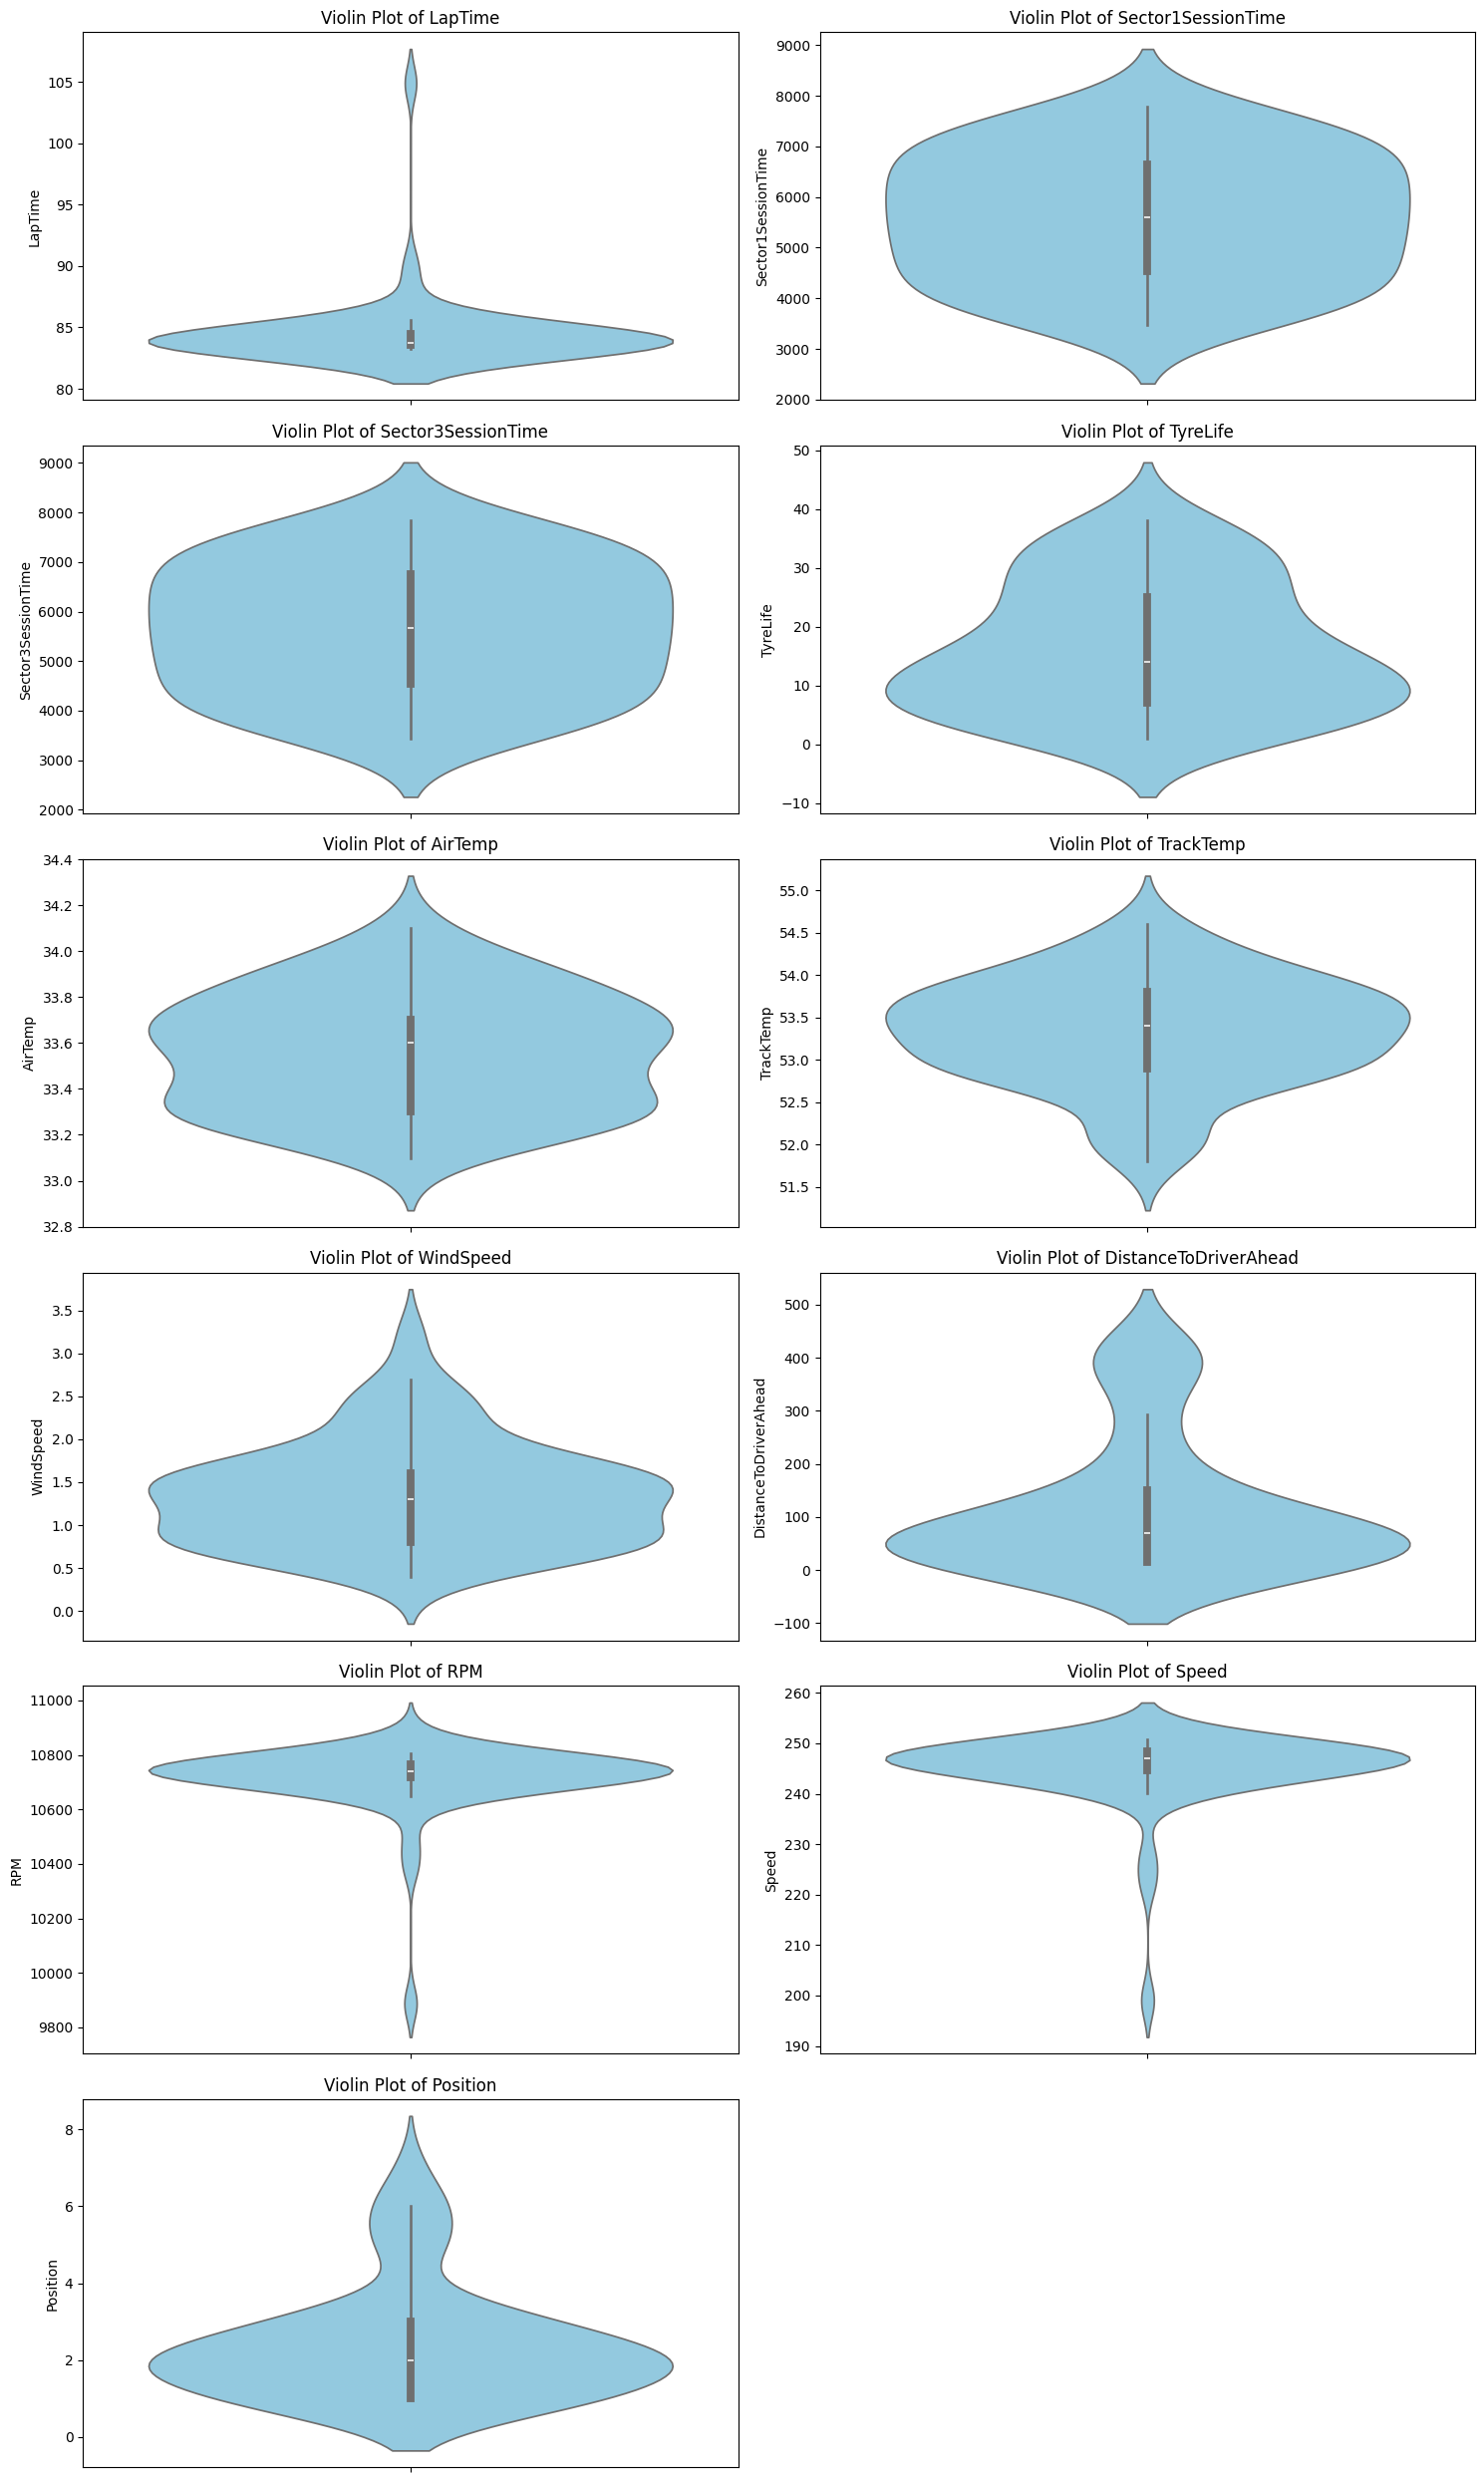

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
file_path = "LEC_data_complete.csv"
data = pd.read_csv(file_path)

# List of numeric columns for the violin plots
numeric_columns = [
    "LapTime", "Sector1SessionTime", "Sector3SessionTime", "TyreLife",
    "AirTemp", "TrackTemp", "WindSpeed", "DistanceToDriverAhead",
    "RPM", "Speed", "Position"
]

# Set up the figure size
plt.figure(figsize=(15, 25))

# Create violin plots for each variable
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 2, i)
    sns.violinplot(data=data, y=column, color="skyblue")
    plt.title(f"Violin Plot of {column}")
    plt.xlabel('')
    plt.ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()


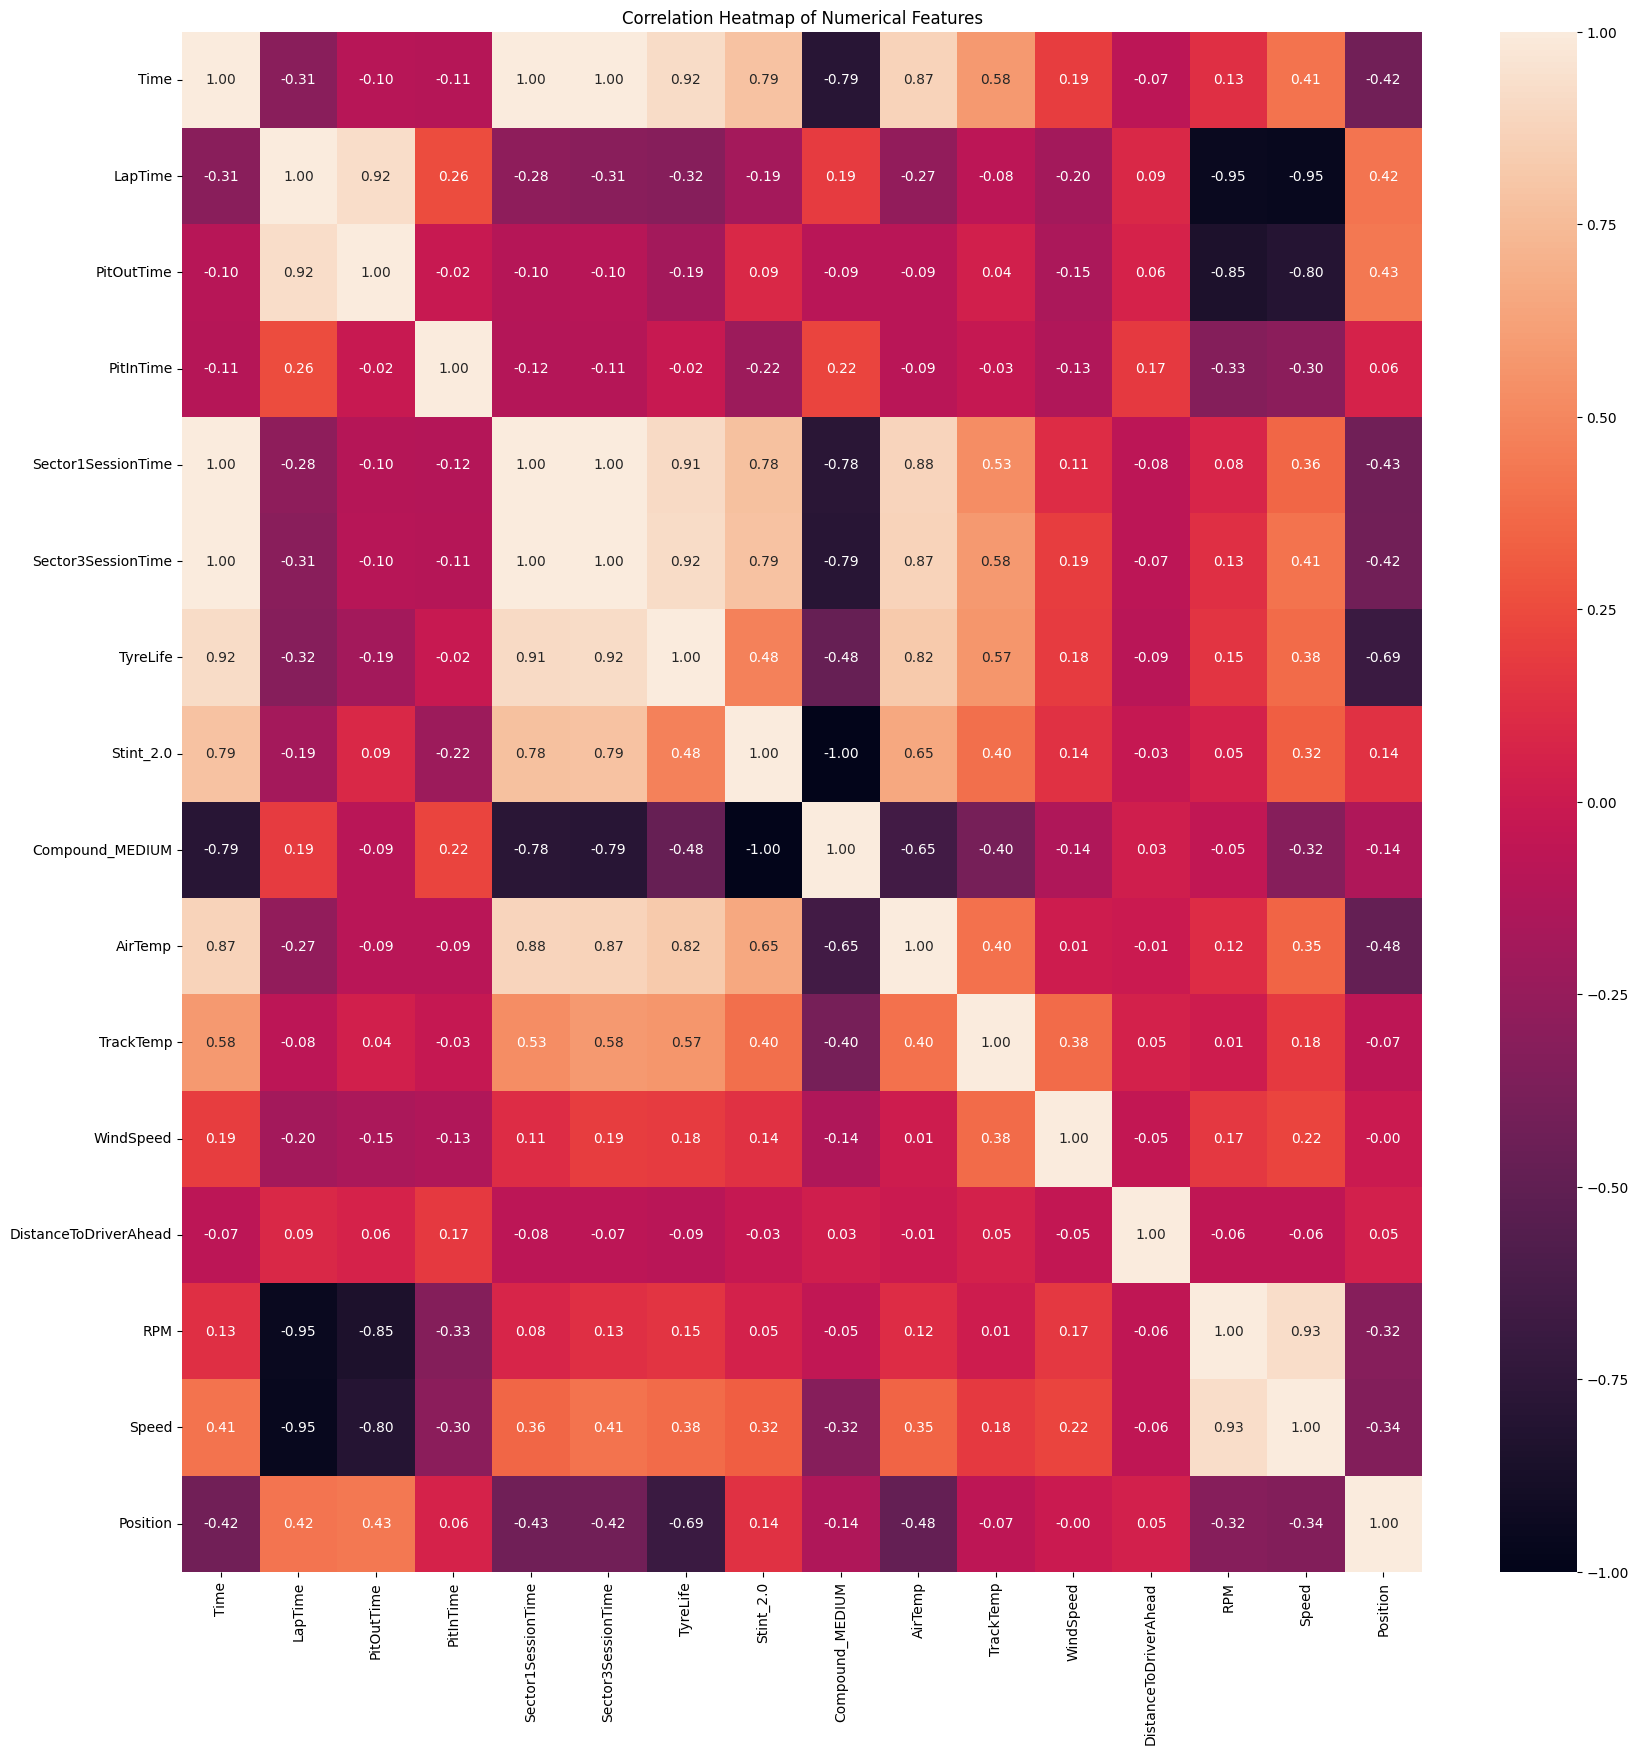

In [30]:
df = pd.read_csv('LEC_data_complete.csv', converters={'Time': pd.to_timedelta, 'PitInTime': pd.to_timedelta, 'PitOutTime': pd.to_timedelta})

plt.figure(1, figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()